# 1.Free parameter inference

## Google drive mount 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
cd /content/gdrive/My Drive

In [ ]:
ls

In [ ]:
cd XPS

In [ ]:
ls

# 주피터노트북에서는 여기서부터 시작하시면 됩니다!

## P3HT_S2p Data Visualization

### Data load and plotting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

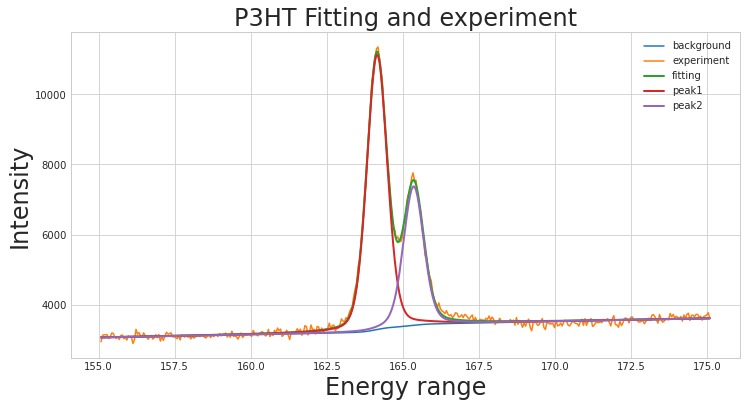

In [ ]:
plt.figure(figsize = (12, 6))

plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [ ]:
# 실험 데이터의 grid number 파악하기
print(bg[:, 0].shape)
print(exp[:, 0].shape)
print(fitting[:, 0].shape)
print(peak1[:, 0].shape)
print(peak2[:, 0].shape)

# Background 제거
reduced_exp = exp[:, 1] - bg[:, 1]
reduced_peak1 = peak1[:, 1] - bg[:, 1]
reduced_peak2 = peak2[:, 1] - bg[:, 1]

# 실험 데이터의 범위 파악
print("XPS exp 최소값: {},  최대값: {}".format(reduced_exp.min(), reduced_exp.max()))
print("XPS peak1 최소값: {},  최대값: {}".format(reduced_peak1.min(), reduced_peak1.max()))
print("XPS peak2 최소값: {},  최대값: {}".format(reduced_peak2.min(), reduced_peak2.max()))


(401,)
(401,)
(600,)
(401,)
(401,)
XPS exp 최소값: -257.34102742614186,  최대값: 8062.741706161443
XPS peak1 최소값: 2.3131095757403273,  최대값: 7841.498304700606
XPS peak2 최소값: 1.3009478766489337,  최대값: 3965.7549875173377


### P3HT-Peak1

In [ ]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 164.15
    x1 = 164.13
    w = 0.789
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[ 5.08563648e-01 -4.44264315e-01  7.92940661e+03]


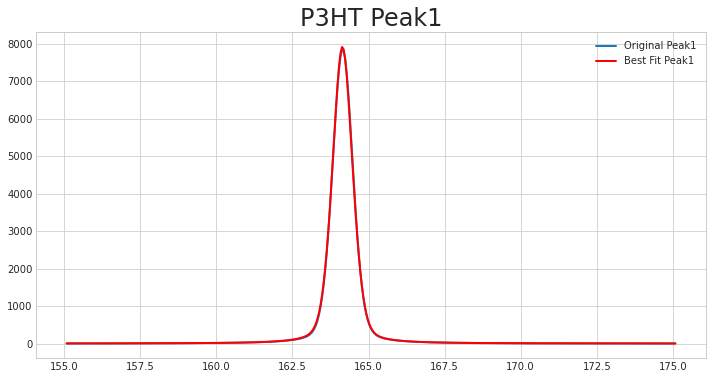

In [ ]:
from scipy.optimize import curve_fit

initial_guess = [1.1, 0.587, 8000 ] 
popt, pcov = curve_fit(voigt, peak1[:,0], peak1[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak1[:, 0], peak1[:, 1] - bg[:, 1], label = "Original Peak1", linewidth=2) # background removed
plt.plot(peak1[:,0], voigt(peak1[:,0], *popt), label = "Best Fit Peak1", color='red', linewidth=2)
plt.title("P3HT Peak1", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### P3HT-Peak2

In [ ]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 165.35
    x1 = 165.36
    w = 0.786
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09599989e-01 4.41623090e-01 4.01031417e+03]


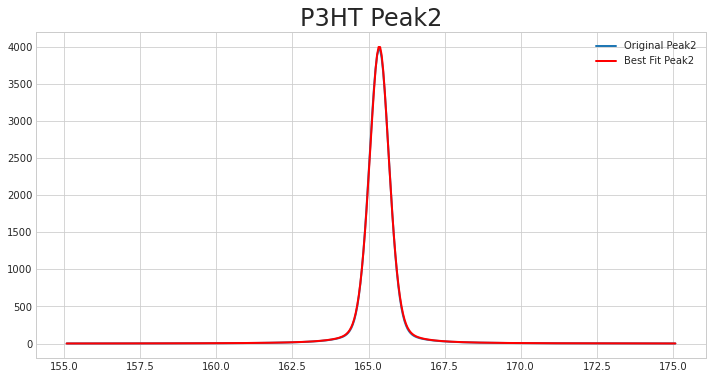

In [ ]:
initial_guess = [4.1, 0.787, 3500 ] 
popt, pcov = curve_fit(voigt, peak2[:,0], peak2[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak2[:, 0], peak2[:, 1] - bg[:, 1], label = "Original Peak2", linewidth=2) # background removed
plt.plot(peak2[:, 0], voigt(peak2[:, 0], *popt), label = "Best Fit Peak2", color='red', linewidth=2)
plt.title("P3HT Peak2", size = 24)
plt.legend()
plt.grid(True)
plt.show();

## ITO_01s Data Visualizaton

### Data load and plotting

In [ ]:
# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

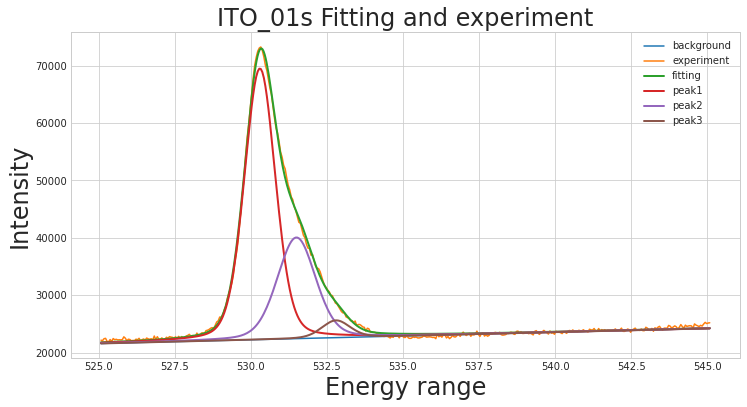

In [ ]:
# Plotting data
plt.figure(figsize = (12, 6))
plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], peak3[:, 1], label = "peak3", linewidth = 2)

plt.grid(True)
plt.title("ITO_01s Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [ ]:
# 실험 데이터의 Grid number 파악
print(bg[:, 0].shape)
print(exp[:, 0].shape)
print(fitting[:, 0].shape)
print(peak1[:, 0].shape)
print(peak2[:, 0].shape)
print(peak3[:, 0].shape)

# Background 제거
reduced_exp = (exp[:, 1] - bg[:, 1])
#reduced_fit = (fitting[:, 1] - bg[:, 1]) 
reduced_peak1 = (peak1[:, 1] - bg[:, 1])
reduced_peak2 = (peak2[:, 1] - bg[:, 1])
reduced_peak3 = (peak3[:, 1] - bg[:, 1])

# 실험 데이터의 범위 파악
print("XPS exp 최소값: {},  최대값: {}".format(reduced_exp.min(), reduced_exp.max()))
#print(reduced_fit.min(), reduced_fit.max())
print("XPS peak1 최소값: {},  최대값: {}".format(reduced_peak1.min(), reduced_peak1.max()))
print("XPS peak2 최소값: {},  최대값: {}".format(reduced_peak2.min(), reduced_peak2.max()))
print("XPS peak3 최소값: {},  최대값: {}".format(reduced_peak3.min(), reduced_peak3.max()))

(401,)
(401,)
(600,)
(401,)
(401,)
(401,)
XPS exp 최소값: -659.0581009918606,  최대값: 50997.315899628484
XPS peak1 최소값: 17.59834339318695,  최대값: 47217.52315118213
XPS peak2 최소값: 11.877135515947884,  최대값: 17624.715464385725
XPS peak3 최소값: 1.3522435990598751,  최대값: 3007.1755983841613


### ITO-Peak1

In [ ]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))

def voigt(x, beta, gamma, amp):
    x0 = 530.3
    x1 = 530.29
    w = 1.199
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09791537e-01 4.41140472e-01 4.76944215e+04]


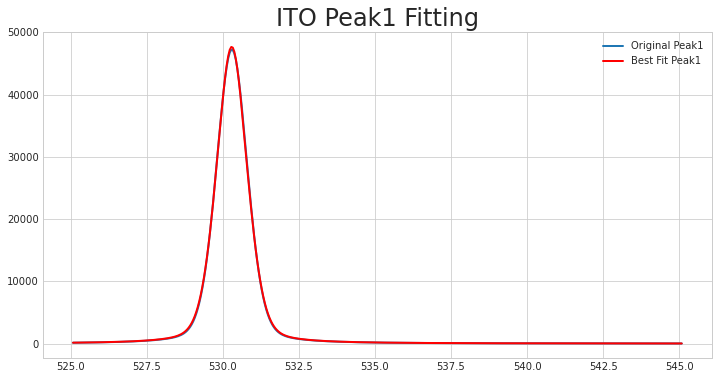

In [ ]:
initial_guess = [1.2, 0.2, 45000 ] 
popt, pcov = curve_fit(voigt, peak1[:,0], peak1[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)


plt.figure(figsize = (12, 6))
plt.plot(peak1[:, 0], peak1[:, 1] - bg[:, 1], label = "Original Peak1", linewidth=2) # background removed
plt.plot(peak1[:,0], voigt(peak1[:,0], *popt), label = "Best Fit Peak1", color='red', linewidth=2)
plt.title("ITO Peak1 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### ITO-Peak2

In [ ]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 531.5
    x1 = 531.49
    w = 1.484
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09500063e-01 4.40710735e-01 1.77975109e+04]


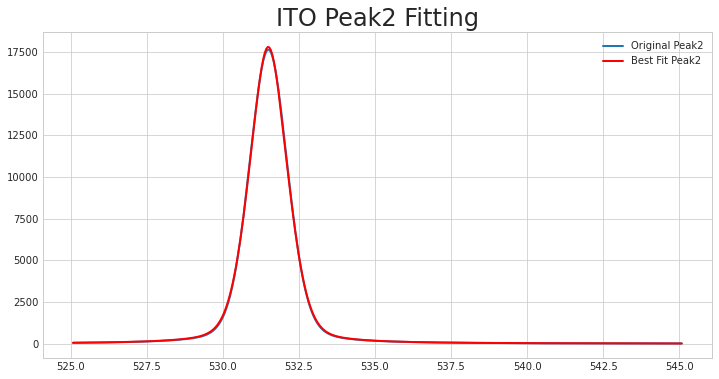

In [ ]:
initial_guess = [0.2, 1.2, 17500 ] 
popt, pcov = curve_fit(voigt, peak2[:,0], peak2[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)


plt.figure(figsize = (12, 6))
plt.plot(peak2[:, 0], peak2[:, 1] - bg[:, 1], label = "Original Peak2", linewidth=2) # background removed
plt.plot(peak2[:,0], voigt(peak2[:,0], *popt), label = "Best Fit Peak2", color='red', linewidth=2)

plt.title("ITO Peak2 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### ITO-Peak3

In [ ]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 532.8
    x1 = 532.79
    w = 1.095
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09789031e-01 4.41127626e-01 3.03808246e+03]


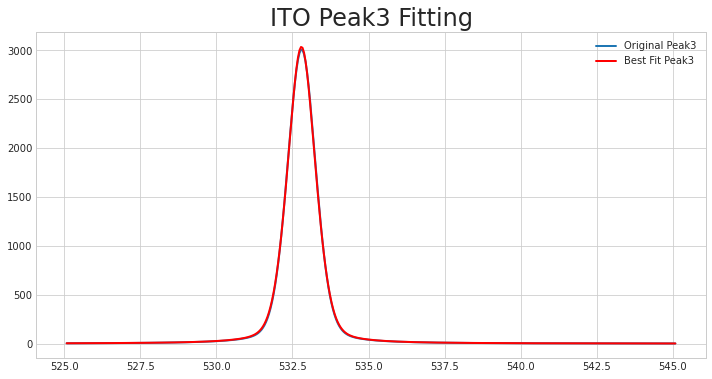

In [ ]:
initial_guess = [0.2, 1.2, 3500 ] 
popt, pcov = curve_fit(voigt, peak3[:,0], peak3[:,1] - bg[:, 1], p0 = initial_guess)
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak3[:, 0], peak3[:, 1] - bg[:, 1], label = "Original Peak3", linewidth=2)
plt.plot(peak3[:,0], voigt(peak3[:,0], *popt), label = "Best Fit Peak3", color='red', linewidth=2)

plt.title("ITO Peak3 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

In [ ]:
# 모두 거의 같음! 확인 ㅎㅎㅎ
# 값을 정밀하게 입력하지 않으면 오차가 커지는 것이었다!

#[5.08563648e-01 -4.44264315e-01  7.92940661e+03]
#[5.10542151e-01 4.39291707e-01 4.01018290e+03]

#[5.09791537e-01 4.41140472e-01 4.76944215e+04]
#[5.09500063e-01 4.40710735e-01 1.77975109e+04]
#[5.09789031e-01 4.41127626e-01 3.03808246e+03]

# 2.Machine Learning Start!

## Data Generation

In [ ]:
# ========== Library import ==========
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect
plt.style.use(["seaborn-whitegrid"])

# ========== Parameter Matrix generation ==========
N = 4  # Maximum number of the possible peak
Data_size = 3000000

# Set of Parameters ready
Parameters = np.zeros((Data_size, 4, 3)) 
print(Parameters.shape)

(3000000, 4, 3)


In [ ]:
# Now we use the new model funtion : 
# voigt function = linear combination of Gaussian and Lorentzian function with some ratio 0.3

def voigt_noise(x, *args, beta = 5.09791537e-01, gamma=4.41140472e-01):
    """ it takes an x-domain and parameter list as an input, and give voigt function graph as an output."""
    amp = args[::3]
    center = args[1::3]
    width = args[2::3]
    
    result = 0
    for i in range(len(center)):
        result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))

        
    for xx in range(len(result)):
        result[xx] += 0.01* ((np.random.rand()*2) - 1)

    return result 
    

    
def voigt(x, *args, beta = 5.09791537e-01, gamma=4.41140472e-01):
    """ it takes an x-domain and parameter list as an input, and give voigt function graph as an output."""
    amp = args[::3]
    center = args[1::3]
    width = args[2::3]
    
    result = 0
    for i in range(len(center)):
        result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))

    return result 
    
    

In [ ]:
# ========== x-domain range ==========
x = np.linspace(0, 15, 401) 
print(len(x))


401


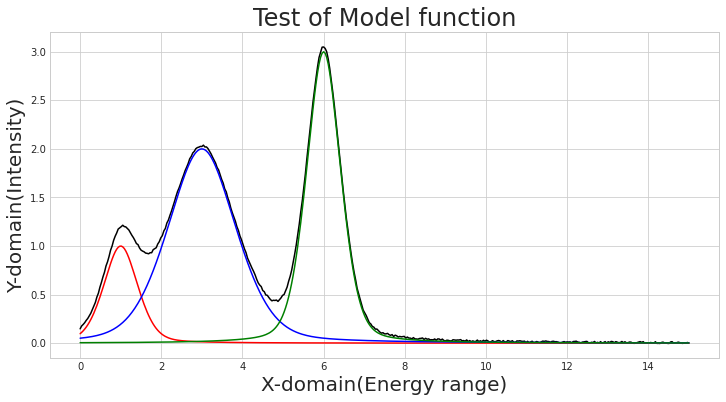

In [ ]:
# ========== Checking out of the voigt function ==========
params = [1, 1, 1, 2, 3, 2, 3, 6, 1]

plt.figure(figsize = (12, 6))
plt.plot(x, voigt_noise(x, *params), color = 'black')

plt.plot(x, voigt(x, *params[:3]), color = 'red')
plt.plot(x, voigt(x, *params[3:6]), color = 'blue')
plt.plot(x, voigt(x, *params[6:]), color = 'green')

plt.title("Test of Model function", size = 24)
plt.xlabel("X-domain(Energy range)", size = 20)
plt.ylabel("Y-domain(Intensity)", size = 20)
plt.grid(True)
plt.show()

In [ ]:
# ========== Generation of Voigt function Parameters with Matrix Form ==========

for i in range(len(Parameters)): # For each matrix in Parameter set..
    for j in range(Parameters.shape[1]): # For each row in each matrix..
        
        # append three arguments that will be used in Voigt function

        center1 = 4 +  (1.8*np.random.rand() - 0.9)
        center2 = 6 +  (1.8*np.random.rand() - 0.9)
        center3 = 8 +  (1.8*np.random.rand() - 0.9)
        center4 = 10 +  (1.8*np.random.rand() - 0.9)
        #center5 = 11 + (2*np.random.rand() - 1)
        
        #                                amplitude      center        width
        Parameters[i][0] = np.array([[np.random.rand(), center1, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][1] = np.array([[np.random.rand(), center2, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][2] = np.array([[np.random.rand(), center3, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][3] = np.array([[np.random.rand(), center4, 0.7 + 0.8*np.random.rand() ]])
        #Parameters[i][4] = np.array([[np.random.rand(), center5, 0.7 + 0.8*np.random.rand() ]])

        
# Check out
print(Parameters)  

[[[1.96159102e-01 3.51918250e+00 7.02446518e-01]
  [9.40140733e-03 6.53087926e+00 1.20480566e+00]
  [8.93721416e-01 8.01484465e+00 1.36476933e+00]
  [4.01979221e-01 9.36095766e+00 1.09698780e+00]]

 [[4.57808898e-01 3.78052382e+00 8.37297501e-01]
  [2.48299637e-01 5.81755150e+00 8.13062913e-01]
  [4.15513016e-01 7.31351747e+00 1.42993687e+00]
  [2.22289171e-02 1.03338562e+01 8.37039139e-01]]

 [[2.44914493e-01 3.99995849e+00 8.23402832e-01]
  [5.89386620e-01 5.33157919e+00 8.13278480e-01]
  [4.42543964e-01 8.50435144e+00 1.33645321e+00]
  [7.15919287e-01 9.63229646e+00 1.18741685e+00]]

 ...

 [[1.16599140e-01 3.78823661e+00 1.03622700e+00]
  [5.94476963e-01 6.15285156e+00 7.15044442e-01]
  [5.86513820e-02 7.98032089e+00 1.17355430e+00]
  [6.62044586e-01 1.03325664e+01 1.17870395e+00]]

 [[6.31476348e-01 3.74584776e+00 7.81720988e-01]
  [3.79336493e-01 5.48766712e+00 1.40882712e+00]
  [9.15312398e-01 7.20222099e+00 8.72001275e-01]
  [9.37864600e-01 1.08787577e+01 1.44028532e+00]]

 [[2

In [ ]:
# ========== Data Generation ==========

GRAPH = []     # y-value of the Voigt function
AREA = []      # Area of the Voigt funtion
NUM_PEAK = []  # Number of peak
AMPLITUDE = [] # Amplitude
CENTER = []    # Center
WIDTH = []     # Width

for j in Parameters:

    peak = random.randint(2, 5)  # Random selection of Possible peak number
    j = list(j.reshape((3*N, ))) # reshaping to put it as *args

    # Appending to list
    GRAPH.append(voigt_noise(x, *j[0:3*peak]))
    AREA.append(sum(voigt(x, *j[0:3*peak])))
    NUM_PEAK.append(peak)
    AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
    CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
    WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))
    

In [ ]:
# ========== Conversion to Numpy.array ==========
GRAPH = np.array(GRAPH)
AREA = np.array(AREA)
NUM_PEAK = np.array(NUM_PEAK)
AMPLITUDE = np.array(AMPLITUDE)
CENTER = np.array(CENTER)
WIDTH = np.array(WIDTH)

# ========== Checking out the shape ==========
print(GRAPH.shape)
print(AREA.shape)
print(NUM_PEAK.shape)
print(AMPLITUDE.shape)
print(CENTER.shape)
print(WIDTH.shape)

(3000000, 401)
(3000000,)
(3000000,)
(3000000, 4)
(3000000, 4)
(3000000, 4)


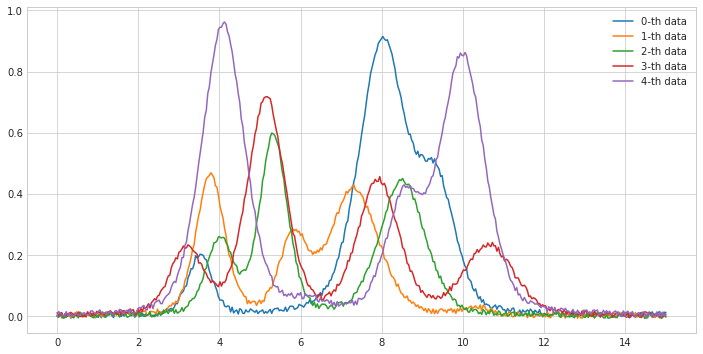

In [ ]:
# ========== Generated Data sample check ==========
plt.figure(figsize = (12, 6))

for i in range(5):
    plt.plot(x, GRAPH[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid(True)

In [ ]:
# ========== Data spliting up into three group ==========
# ========== Training / Validation / Test ==========

# lorentzian graph
train_graph = np.array(GRAPH[:2800000])
val_graph   = np.array(GRAPH[2800000:2950000])
test_graph  = np.array(GRAPH[2950000:])

# area label
train_area = np.array(AREA[:2800000])
val_area   = np.array(AREA[2800000:2950000])
test_area  = np.array(AREA[2950000:])

# number of peak label
train_num_peak = np.array(NUM_PEAK[:2800000])
val_num_peak   = np.array(NUM_PEAK[2800000:2950000])
test_num_peak  = np.array(NUM_PEAK[2950000:])

# amplitude label
train_amp = np.array(AMPLITUDE[:2800000])
val_amp   = np.array(AMPLITUDE[2800000:2950000])
test_amp  = np.array(AMPLITUDE[2950000:])

# center label
train_center = np.array(CENTER[:2800000])
val_center   = np.array(CENTER[2800000:2950000])
test_center  = np.array(CENTER[2950000:])

# width label
train_width = np.array(WIDTH[:2800000])
val_width   = np.array(WIDTH[2800000:2950000])
test_width  = np.array(WIDTH[2950000:])

In [ ]:
# ========== Size check ==========
print(train_graph.shape, train_area.shape, train_num_peak.shape, 
      train_amp.shape, train_center.shape, train_width.shape)
print(val_graph.shape, val_area.shape, val_num_peak.shape, 
      val_amp.shape, val_center.shape, val_width.shape)
print(test_graph.shape, test_area.shape, test_num_peak.shape, 
      test_amp.shape, test_center.shape, test_width.shape)


(2800000, 401) (2800000,) (2800000,) (2800000, 4) (2800000, 4) (2800000, 4)
(150000, 401) (150000,) (150000,) (150000, 4) (150000, 4) (150000, 4)
(50000, 401) (50000,) (50000,) (50000, 4) (50000, 4) (50000, 4)


In [ ]:
# ========== reshape for Image-from setting ==========
# 1차원 그래프 변환

train_graph = train_graph.reshape(2800000, len(x), 1)
val_graph   = val_graph.reshape(150000, len(x), 1)
test_graph  = test_graph.reshape(50000, len(x), 1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(2800000, 401, 1)
(150000, 401, 1)
(50000, 401, 1)


## 2. Functional API를 활용한 비계층적 구조 신경망 작성

In [1]:
# 최대한 간단한 구조로 만들기!



from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate

# input layer
main_inputs = Input(shape = (len(x), 1))
#main_inputs2 = BatchNormalization()(main_inputs)

# At least three Convolution layer is needed => other paper
# Adding BatchNormalization layer => we expect the effect of regularization
x_conv1 = Conv1D(32, kernel_size = 100, activation = 'relu')(main_inputs)
x_pooling1 = MaxPooling1D(pool_size = 2)(x_conv1)

x_conv2 = Conv1D(16, kernel_size = 50, activation = 'relu')(x_pooling1)
x_pooling2 = MaxPooling1D(pool_size = 2)(x_conv2)

x_conv3 = Conv1D(16, kernel_size = 25, activation = 'relu')(x_pooling2)
x_pooling3 = MaxPooling1D(pool_size = 2)(x_conv3)

x_GMpooling = GlobalMaxPooling1D()(x_pooling3)


# output : area
hidden_area1 = Dense(100, activation = 'relu')(x_GMpooling)
hidden_area2 = Dense(50, activation = 'relu')(hidden_area1)
output_area = Dense(1, activation = 'linear', name = 'area')(hidden_area2)


# output : number of peak
hidden_num_peak1 = Dense(100, activation = 'relu')(x_GMpooling)
hidden_num_peak2 = Dense(50, activation = 'relu')(hidden_num_peak1)
output_num_peak = Dense(1, activation = 'linear', name = 'num_peak')(hidden_num_peak2)


# merging features into one layer
merge = concatenate([output_area, output_num_peak, x_GMpooling])
merge2 = BatchNormalization()(merge)

# prediction output
hidden_amp1 = Dense(100, activation = 'relu')(merge2)
hidden_amp2 = Dense(100, activation = 'relu')(hidden_amp1)
output_amp = Dense(N, activation = 'linear', name = 'output_amp')(hidden_amp2)

hidden_center1 = Dense(100, activation = 'relu')(merge2)
hidden_center2 = Dense(100, activation = 'relu')(hidden_center1)
output_center = Dense(N, activation = 'linear', name = 'output_center')(hidden_center2)

hidden_width1 = Dense(100, activation = 'relu')(merge2)
hidden_width2 = Dense(100, activation = 'relu')(hidden_width1)
output_width = Dense(N, activation = 'linear', name = 'output_width')(hidden_width2)



# Definition of model with out input, five output
model = Model(inputs = main_inputs,
              outputs = [output_area, output_num_peak, output_amp, output_center, output_width])

# Summarize layers
print(model.summary())
# plot graph
plot_model(model)

NameError: ignored

In [2]:
from keras.models import *
from keras.layers import *

GlobalMaxPooling2D( )

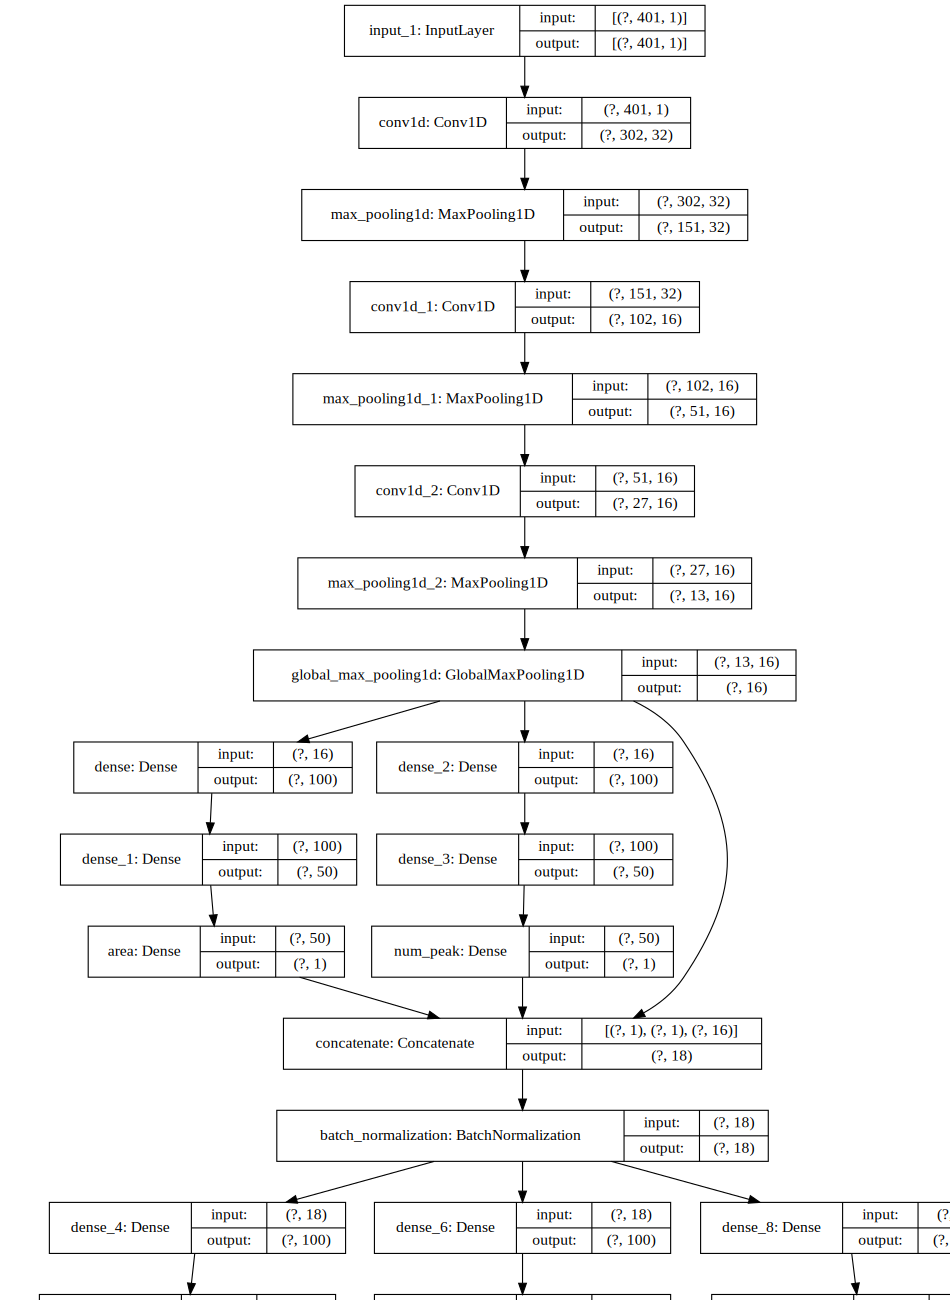

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes = True, expand_nested = True,
                 dpi = 65).create(prog = 'dot', format = 'svg'))


In [ ]:
# 학습방법 설정
model.compile(loss = ['mse', 'mse', 'mse', 'mse', 'mse'],
              metrics = ['mae'], 
              optimizer = 'adam')


In [ ]:
# 이 부분에서 콜백 함수에 넣을 콜백리스트 정의할 것!
import keras

callbacks_list = [
    # 조기종료 콜백함수 : val loss 감시, 10에폭까지 기다림
    #keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
    
    # 모델 체크포인트 콜백함수 : 모델을 h5로 저장, 최적 모델만을 저장
    keras.callbacks.ModelCheckpoint(filepath = "LAST_CODE_Model_3.h5", monitor = 'val_loss', save_best_only = True),
    
    # 학습률 감소 콜백함수 : val loss 감시, 검증 손실 향상안될때 10분의 1감소시킴
    keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10)
]




In [ ]:
%%time
hist = model.fit(train_graph, [train_area, train_num_peak, train_amp, train_center, train_width],
                 epochs = 85,
                 batch_size = 3000,
                 callbacks = callbacks_list,
                 validation_data = (val_graph, [val_area, val_num_peak, val_amp, val_center, val_width]),
                 verbose = 2)


Epoch 1/85
934/934 - 26s - loss: 64.5334 - area_loss: 57.9319 - num_peak_loss: 2.6449 - output_amp_loss: 0.0324 - output_center_loss: 3.8403 - output_width_loss: 0.0838 - area_mae: 2.3454 - num_peak_mae: 0.8824 - output_amp_mae: 0.1294 - output_center_mae: 1.1364 - output_width_mae: 0.2195 - val_loss: 3.1597 - val_area_loss: 0.2226 - val_num_peak_loss: 0.3958 - val_output_amp_loss: 0.0251 - val_output_center_loss: 2.4397 - val_output_width_loss: 0.0766 - val_area_mae: 0.3438 - val_num_peak_mae: 0.5112 - val_output_amp_mae: 0.1136 - val_output_center_mae: 0.8277 - val_output_width_mae: 0.2173 - lr: 0.0010
Epoch 2/85
934/934 - 25s - loss: 1.4139 - area_loss: 0.2413 - num_peak_loss: 0.3043 - output_amp_loss: 0.0196 - output_center_loss: 0.8008 - output_width_loss: 0.0478 - area_mae: 0.3687 - num_peak_mae: 0.4412 - output_amp_mae: 0.0992 - output_center_mae: 0.4605 - output_width_mae: 0.1704 - val_loss: 1.3677 - val_area_loss: 0.3823 - val_num_peak_loss: 0.2346 - val_output_amp_loss: 0.020

Epoch 15/85
934/934 - 26s - loss: 0.5725 - area_loss: 0.1424 - num_peak_loss: 0.1635 - output_amp_loss: 0.0075 - output_center_loss: 0.2296 - output_width_loss: 0.0296 - area_mae: 0.2667 - num_peak_mae: 0.3210 - output_amp_mae: 0.0590 - output_center_mae: 0.1819 - output_width_mae: 0.1248 - val_loss: 0.9749 - val_area_loss: 0.4009 - val_num_peak_loss: 0.1780 - val_output_amp_loss: 0.0130 - val_output_center_loss: 0.3423 - val_output_width_loss: 0.0406 - val_area_mae: 0.5778 - val_num_peak_mae: 0.3437 - val_output_amp_mae: 0.0779 - val_output_center_mae: 0.2403 - val_output_width_mae: 0.1470 - lr: 0.0010
Epoch 16/85
934/934 - 26s - loss: 0.5584 - area_loss: 0.1428 - num_peak_loss: 0.1602 - output_amp_loss: 0.0072 - output_center_loss: 0.2199 - output_width_loss: 0.0284 - area_mae: 0.2787 - num_peak_mae: 0.3152 - output_amp_mae: 0.0576 - output_center_mae: 0.1747 - output_width_mae: 0.1215 - val_loss: 0.5125 - val_area_loss: 0.0732 - val_num_peak_loss: 0.1500 - val_output_amp_loss: 0.011

Epoch 29/85
934/934 - 26s - loss: 0.4355 - area_loss: 0.1043 - num_peak_loss: 0.1435 - output_amp_loss: 0.0047 - output_center_loss: 0.1651 - output_width_loss: 0.0180 - area_mae: 0.2136 - num_peak_mae: 0.2862 - output_amp_mae: 0.0460 - output_center_mae: 0.1288 - output_width_mae: 0.0889 - val_loss: 1.0720 - val_area_loss: 0.7338 - val_num_peak_loss: 0.1394 - val_output_amp_loss: 0.0063 - val_output_center_loss: 0.1722 - val_output_width_loss: 0.0203 - val_area_mae: 0.7877 - val_num_peak_mae: 0.2771 - val_output_amp_mae: 0.0525 - val_output_center_mae: 0.1334 - val_output_width_mae: 0.0980 - lr: 0.0010
Epoch 30/85
934/934 - 25s - loss: 0.4210 - area_loss: 0.0938 - num_peak_loss: 0.1429 - output_amp_loss: 0.0045 - output_center_loss: 0.1624 - output_width_loss: 0.0174 - area_mae: 0.2226 - num_peak_mae: 0.2846 - output_amp_mae: 0.0452 - output_center_mae: 0.1263 - output_width_mae: 0.0869 - val_loss: 0.3772 - val_area_loss: 0.0166 - val_num_peak_loss: 0.1496 - val_output_amp_loss: 0.006

Epoch 43/85
934/934 - 25s - loss: 0.3809 - area_loss: 0.0743 - num_peak_loss: 0.1399 - output_amp_loss: 0.0035 - output_center_loss: 0.1487 - output_width_loss: 0.0145 - area_mae: 0.1940 - num_peak_mae: 0.2756 - output_amp_mae: 0.0398 - output_center_mae: 0.1135 - output_width_mae: 0.0760 - val_loss: 0.4692 - val_area_loss: 0.1484 - val_num_peak_loss: 0.1393 - val_output_amp_loss: 0.0059 - val_output_center_loss: 0.1512 - val_output_width_loss: 0.0244 - val_area_mae: 0.3324 - val_num_peak_mae: 0.2707 - val_output_amp_mae: 0.0514 - val_output_center_mae: 0.1223 - val_output_width_mae: 0.1087 - lr: 0.0010
Epoch 44/85
934/934 - 25s - loss: 0.3754 - area_loss: 0.0701 - num_peak_loss: 0.1396 - output_amp_loss: 0.0035 - output_center_loss: 0.1479 - output_width_loss: 0.0143 - area_mae: 0.1918 - num_peak_mae: 0.2741 - output_amp_mae: 0.0396 - output_center_mae: 0.1119 - output_width_mae: 0.0750 - val_loss: 0.4524 - val_area_loss: 0.1430 - val_num_peak_loss: 0.1406 - val_output_amp_loss: 0.003

Epoch 57/85
934/934 - 25s - loss: 0.3525 - area_loss: 0.0560 - num_peak_loss: 0.1385 - output_amp_loss: 0.0030 - output_center_loss: 0.1417 - output_width_loss: 0.0132 - area_mae: 0.1727 - num_peak_mae: 0.2714 - output_amp_mae: 0.0366 - output_center_mae: 0.1054 - output_width_mae: 0.0710 - val_loss: 0.3449 - val_area_loss: 0.0398 - val_num_peak_loss: 0.1369 - val_output_amp_loss: 0.0036 - val_output_center_loss: 0.1491 - val_output_width_loss: 0.0155 - val_area_mae: 0.1662 - val_num_peak_mae: 0.2688 - val_output_amp_mae: 0.0394 - val_output_center_mae: 0.1280 - val_output_width_mae: 0.0832 - lr: 0.0010
Epoch 58/85
934/934 - 26s - loss: 0.3544 - area_loss: 0.0579 - num_peak_loss: 0.1386 - output_amp_loss: 0.0031 - output_center_loss: 0.1417 - output_width_loss: 0.0131 - area_mae: 0.1769 - num_peak_mae: 0.2713 - output_amp_mae: 0.0368 - output_center_mae: 0.1059 - output_width_mae: 0.0708 - val_loss: 0.4488 - val_area_loss: 0.1069 - val_num_peak_loss: 0.1408 - val_output_amp_loss: 0.006

Epoch 71/85
934/934 - 25s - loss: 0.3405 - area_loss: 0.0493 - num_peak_loss: 0.1379 - output_amp_loss: 0.0029 - output_center_loss: 0.1380 - output_width_loss: 0.0125 - area_mae: 0.1648 - num_peak_mae: 0.2699 - output_amp_mae: 0.0359 - output_center_mae: 0.1013 - output_width_mae: 0.0682 - val_loss: 0.3495 - val_area_loss: 0.0552 - val_num_peak_loss: 0.1363 - val_output_amp_loss: 0.0053 - val_output_center_loss: 0.1388 - val_output_width_loss: 0.0140 - val_area_mae: 0.1966 - val_num_peak_mae: 0.2655 - val_output_amp_mae: 0.0477 - val_output_center_mae: 0.1090 - val_output_width_mae: 0.0765 - lr: 0.0010
Epoch 72/85
934/934 - 25s - loss: 0.2835 - area_loss: 0.0113 - num_peak_loss: 0.1353 - output_amp_loss: 0.0023 - output_center_loss: 0.1232 - output_width_loss: 0.0113 - area_mae: 0.0835 - num_peak_mae: 0.2649 - output_amp_mae: 0.0311 - output_center_mae: 0.0868 - output_width_mae: 0.0627 - val_loss: 0.2889 - val_area_loss: 0.0111 - val_num_peak_loss: 0.1358 - val_output_amp_loss: 0.002

Epoch 85/85
934/934 - 25s - loss: 0.2798 - area_loss: 0.0106 - num_peak_loss: 0.1352 - output_amp_loss: 0.0022 - output_center_loss: 0.1210 - output_width_loss: 0.0109 - area_mae: 0.0810 - num_peak_mae: 0.2642 - output_amp_mae: 0.0299 - output_center_mae: 0.0837 - output_width_mae: 0.0608 - val_loss: 0.2839 - val_area_loss: 0.0101 - val_num_peak_loss: 0.1357 - val_output_amp_loss: 0.0022 - val_output_center_loss: 0.1250 - val_output_width_loss: 0.0110 - val_area_mae: 0.0792 - val_num_peak_mae: 0.2653 - val_output_amp_mae: 0.0293 - val_output_center_mae: 0.0802 - val_output_width_mae: 0.0613 - lr: 1.0000e-04
CPU times: user 1h 5min 48s, sys: 44min 39s, total: 1h 50min 28s
Wall time: 36min 14s


In [ ]:
for key in hist.history.keys():
    print(key)  # list of every loss function names

loss
area_loss
num_peak_loss
output_amp_loss
output_center_loss
output_width_loss
area_mae
num_peak_mae
output_amp_mae
output_center_mae
output_width_mae
val_loss
val_area_loss
val_num_peak_loss
val_output_amp_loss
val_output_center_loss
val_output_width_loss
val_area_mae
val_num_peak_mae
val_output_amp_mae
val_output_center_mae
val_output_width_mae
lr


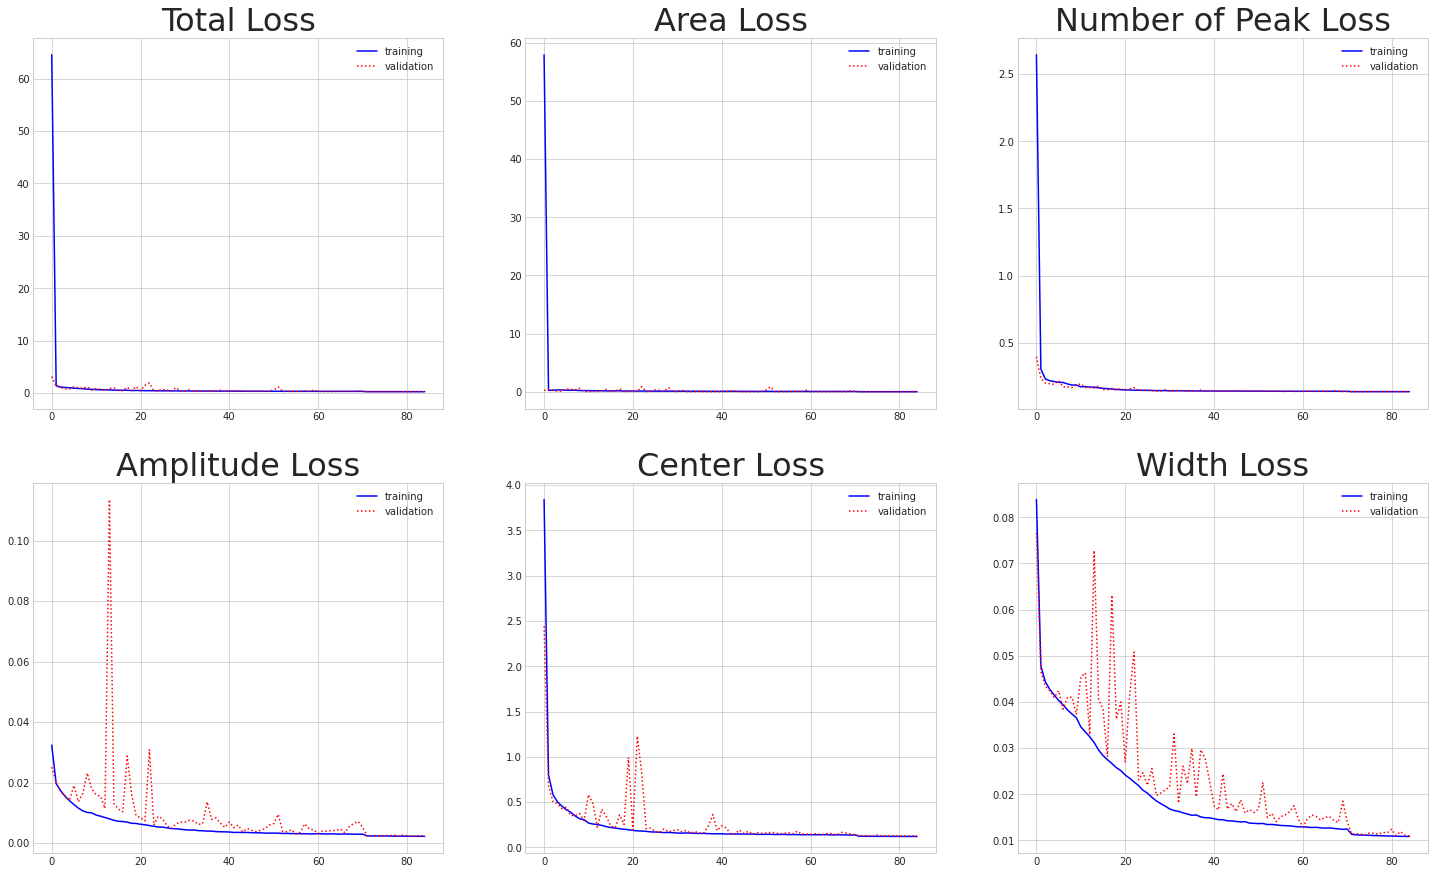

In [ ]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(hist.history['loss'], 'b-', label = 'training')
plt.plot(hist.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()

plt.subplot(232)
plt.plot(hist.history['area_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_area_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Area Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(hist.history['num_peak_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_num_peak_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(hist.history['output_amp_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_amp_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Amplitude Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(hist.history['output_center_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_center_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Center Loss", size = 32)
plt.legend()

plt.subplot(236)
plt.plot(hist.history['output_width_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_width_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Width Loss", size = 32)
plt.legend()



### Test data

In [ ]:
print(test_graph.shape)

(50000, 401, 1)


In [ ]:
prediction = model.predict(test_graph)
print(len(prediction))

5


In [ ]:
print(prediction[0].shape)  # area
print(prediction[1].shape)  # num_peak
print(prediction[2].shape)  # amplitude
print(prediction[3].shape)  # center
print(prediction[4].shape)  # width

(50000, 1)
(50000, 1)
(50000, 4)
(50000, 4)
(50000, 4)


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


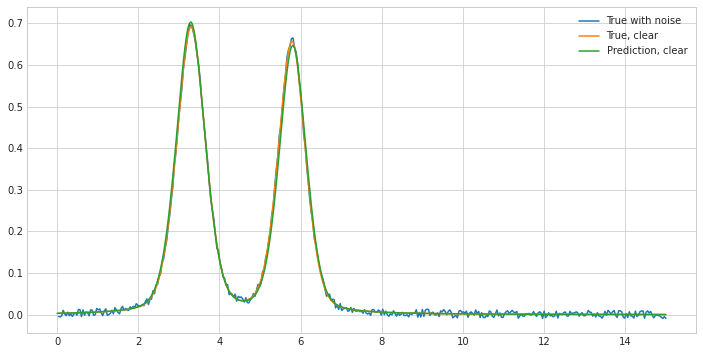

Predicted area: [34.228683]
     True area: 34.20723897051515
Predicted num_peak: [2.0032048]
     True num_peak: 2
Predicted amplitude: [ 6.9954157e-01  6.4248508e-01  8.2935346e-04 -5.4271333e-04]
     True amplitude: [0.68843472 0.65267671 0.         0.        ]
Predicted center: [3.2916038e+00 5.8069868e+00 1.4960229e-02 5.0433725e-03]
     True center: [3.30075672 5.78585933 0.         0.        ]
Predicted width: [ 8.5462999e-01  7.9858780e-01 -2.7122796e-03  7.5636804e-04]
     True width: [0.84957423 0.7993374  0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


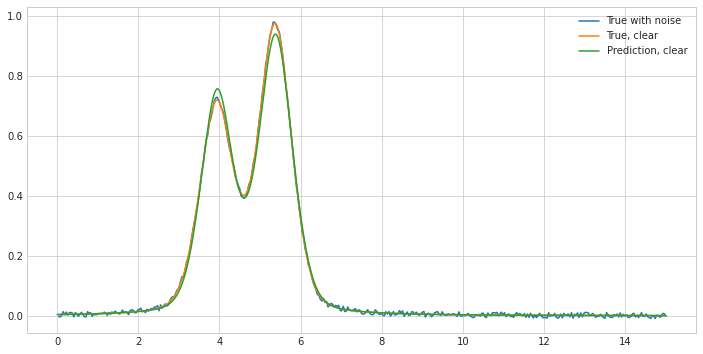

Predicted area: [50.19577]
     True area: 50.177951993771416
Predicted num_peak: [2.0138485]
     True num_peak: 2
Predicted amplitude: [7.3134166e-01 9.2196119e-01 1.9553187e-03 5.2856840e-04]
     True amplitude: [0.69428472 0.957351   0.         0.        ]
Predicted center: [ 3.9417081e+00  5.3841200e+00  4.2297482e-02 -3.9407164e-03]
     True center: [3.93051795 5.37350001 0.         0.        ]
Predicted width: [0.9456142  0.99727124 0.00367895 0.00497052]
     True width: [0.99511429 0.97628021 0.         0.        ]


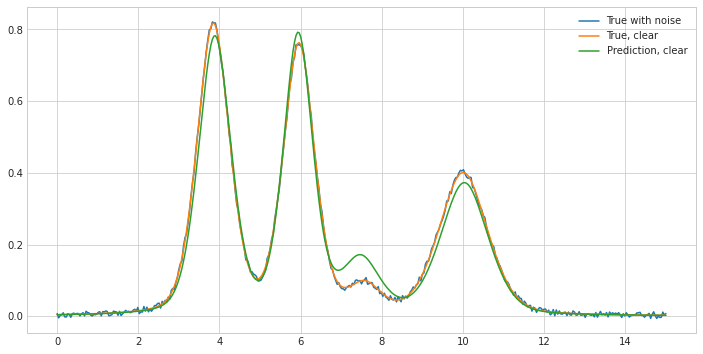

Predicted area: [64.99339]
     True area: 65.08932243050765
Predicted num_peak: [4.511778]
     True num_peak: 5
Predicted amplitude: [0.7735144  0.7764634  0.14917111 0.36821666]
     True amplitude: [0.80891042 0.74990475 0.07556252 0.39704961]
Predicted center: [ 3.8848581  5.939299   7.4816737 10.03587  ]
     True center: [ 3.84878477  5.95857873  7.57600008 10.00674395]
Predicted width: [0.95389795 0.8616689  1.1100465  1.3965609 ]
     True width: [0.9614892  0.92163094 0.93969569 1.43880012]


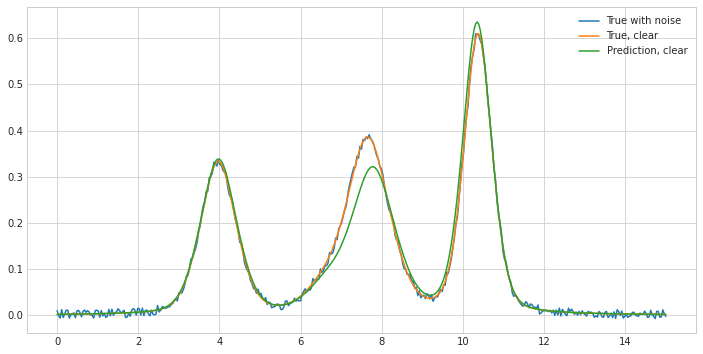

Predicted area: [42.037327]
     True area: 42.143758000552886
Predicted num_peak: [4.506189]
     True num_peak: 5
Predicted amplitude: [0.3355382  0.05163426 0.3120461  0.63005054]
     True amplitude: [0.32984584 0.04108587 0.37854794 0.60512846]
Predicted center: [ 3.977124   6.5958233  7.7835813 10.349643 ]
     True center: [ 3.96910327  6.50541107  7.65850152 10.37262905]
Predicted width: [1.0668796 1.1356335 1.2726219 0.8465996]
     True width: [1.04806834 1.0656812  1.25965065 0.82489422]


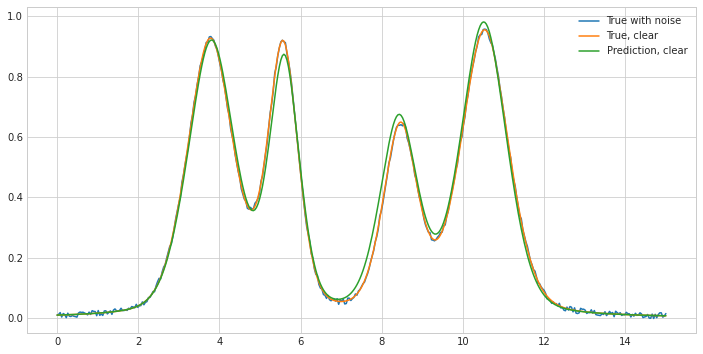

Predicted area: [122.46663]
     True area: 122.43228203325378
Predicted num_peak: [4.532313]
     True num_peak: 4
Predicted amplitude: [0.9059563  0.82896763 0.642343   0.96778166]
     True amplitude: [0.91214606 0.87828145 0.61535142 0.94390348]
Predicted center: [ 3.8010187  5.596773   8.422567  10.514069 ]
     True center: [ 3.77418495  5.56649165  8.4606287  10.5364329 ]
Predicted width: [1.3851281 0.8919691 1.1154311 1.3668362]
     True width: [1.36049884 0.89595597 1.01848931 1.4074252 ]


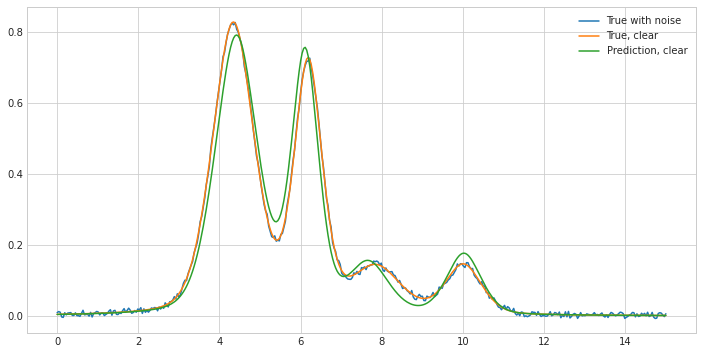

Predicted area: [59.183273]
     True area: 59.20965629669935
Predicted num_peak: [4.5164647]
     True num_peak: 4
Predicted amplitude: [0.78141916 0.7251641  0.13805254 0.17128253]
     True amplitude: [0.81914067 0.69886756 0.12854876 0.13963379]
Predicted center: [ 4.4166713  6.108886   7.672861  10.024965 ]
     True center: [ 4.3399887   6.18619857  7.86080336 10.01062008]
Predicted width: [1.2455063 0.7944843 1.1671165 1.015734 ]
     True width: [1.23433266 0.82156201 1.45514334 1.06636307]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


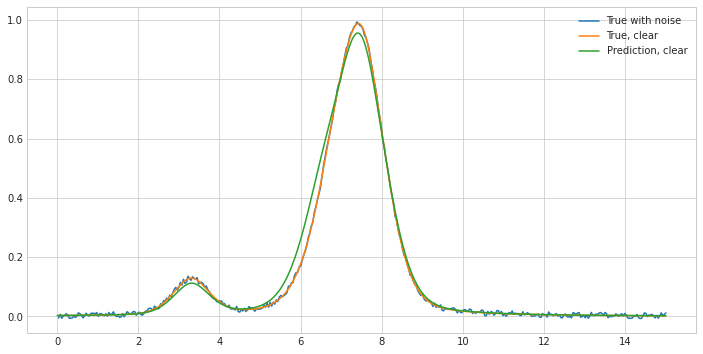

Predicted area: [52.195175]
     True area: 52.04688251972261
Predicted num_peak: [3.0347]
     True num_peak: 3
Predicted amplitude: [0.10357772 0.25771093 0.89445335 0.00647427]
     True amplitude: [0.1216962  0.28915703 0.83489065 0.        ]
Predicted center: [3.3110619  6.4755673  7.4686966  0.08678852]
     True center: [3.30203018 6.8076538  7.51633348 0.        ]
Predicted width: [1.0539848  1.2993054  1.4660391  0.01067114]
     True width: [1.05959988 1.41756663 1.38084709 0.        ]


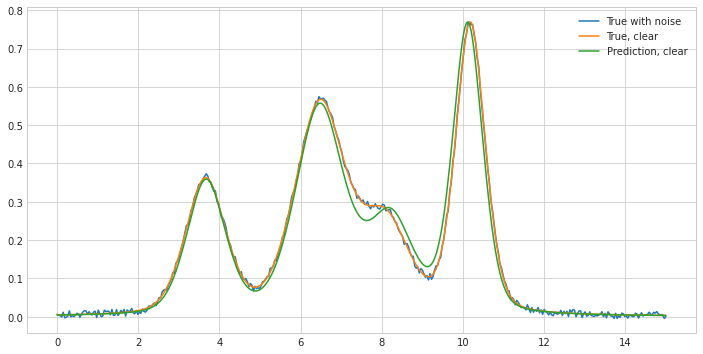

Predicted area: [68.443565]
     True area: 68.49652913741394
Predicted num_peak: [4.517019]
     True num_peak: 4
Predicted amplitude: [0.34941608 0.54213876 0.24743892 0.75724   ]
     True amplitude: [0.35280094 0.54824698 0.23355254 0.75857324]
Predicted center: [ 3.6717718  6.472124   8.213411  10.11767  ]
     True center: [ 3.6571225   6.47883379  8.09522795 10.18243284]
Predicted width: [1.142464  1.4249852 1.3354266 0.8857497]
     True width: [1.19285321 1.490879   1.39451289 0.87174279]


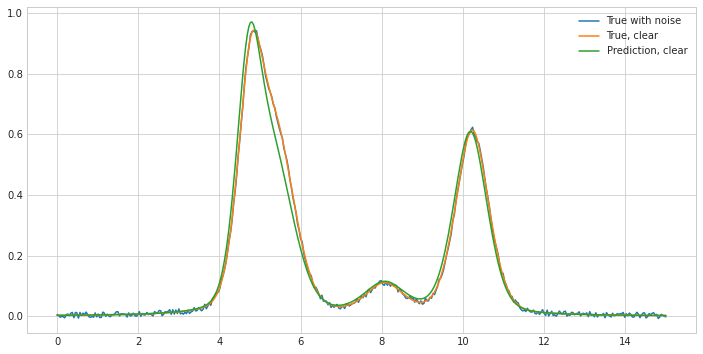

Predicted area: [56.709625]
     True area: 56.72501668162612
Predicted num_peak: [4.5164027]
     True num_peak: 5
Predicted amplitude: [0.7805463  0.4556865  0.10073758 0.60565704]
     True amplitude: [0.76417921 0.51545906 0.09689025 0.61059577]
Predicted center: [ 4.732698  5.39341   8.071812 10.183862]
     True center: [ 4.78040583  5.46116638  8.07011768 10.22949249]
Predicted width: [0.7618872 1.125093  1.211752  0.9939333]
     True width: [0.78422463 1.03473488 1.08973721 0.97734916]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


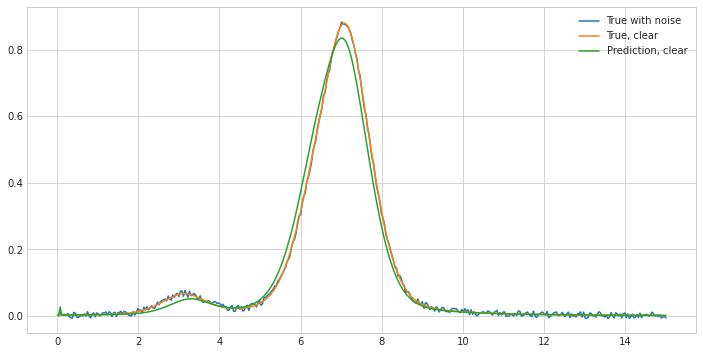

Predicted area: [45.09726]
     True area: 45.24816593018684
Predicted num_peak: [3.014063]
     True num_peak: 3
Predicted amplitude: [0.04318567 0.23849258 0.7434995  0.02469544]
     True amplitude: [0.06002879 0.13238749 0.85018634 0.        ]
Predicted center: [3.2710176  6.2667017  7.1009917  0.07531653]
     True center: [3.11316374 6.17970011 7.10908096 0.        ]
Predicted width: [1.2116312  1.3373654  1.4326552  0.01188953]
     True width: [1.2728237  1.18599877 1.45659835 0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


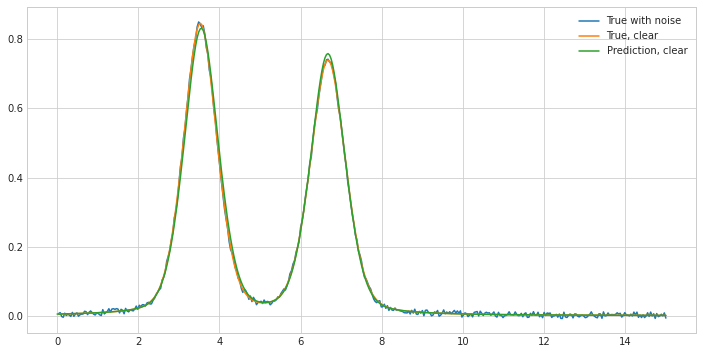

Predicted area: [49.217205]
     True area: 49.32485070270938
Predicted num_peak: [2.0269895]
     True num_peak: 2
Predicted amplitude: [ 0.82751435  0.75383073 -0.00121046  0.00171191]
     True amplitude: [0.84176442 0.73503927 0.         0.        ]
Predicted center: [3.5512698  6.671883   0.06482166 0.00694118]
     True center: [3.5265477  6.67378521 0.         0.        ]
Predicted width: [1.0101291  1.0222483  0.02119181 0.00421493]
     True width: [0.98895253 1.04320807 0.         0.        ]


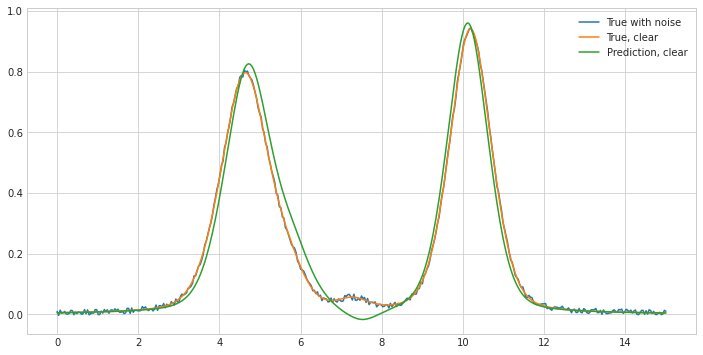

Predicted area: [73.08672]
     True area: 73.2370987800312
Predicted num_peak: [4.518505]
     True num_peak: 4
Predicted amplitude: [ 0.80951387  0.14812537 -0.04315482  0.9569338 ]
     True amplitude: [0.79037692 0.073809   0.03282475 0.93762417]
Predicted center: [ 4.7072206  5.842605   7.5136805 10.117763 ]
     True center: [ 4.63500903  5.77033287  7.28449271 10.18600541]
Predicted width: [1.3638954 1.107306  1.0490477 1.2134103]
     True width: [1.43052681 0.92427461 0.88683619 1.23293151]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


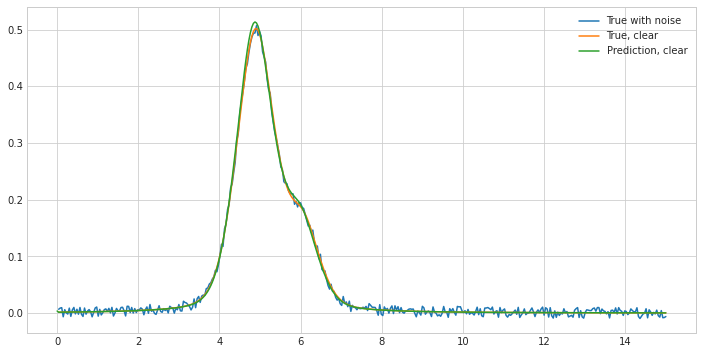

Predicted area: [21.166931]
     True area: 21.161709896561362
Predicted num_peak: [2.0022974]
     True num_peak: 2
Predicted amplitude: [ 0.5043308   0.15151006 -0.00438784  0.00404536]
     True amplitude: [0.49573376 0.14097759 0.         0.        ]
Predicted center: [ 4.8671622e+00  5.9984035e+00  1.9686162e-02 -9.8158419e-04]
     True center: [4.89340289 6.06870749 0.         0.        ]
Predicted width: [1.0658458  0.99380505 0.01103428 0.00207281]
     True width: [1.11271541 0.95358301 0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


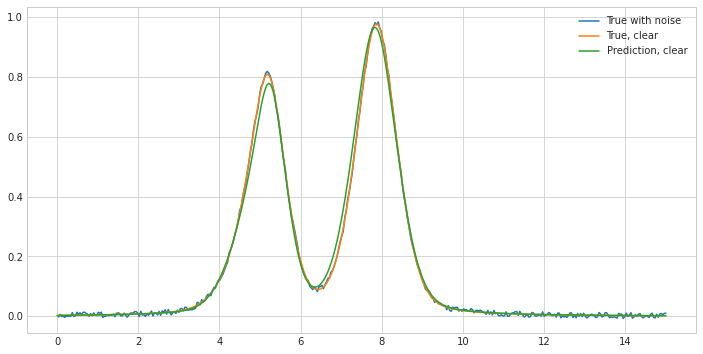

Predicted area: [64.197624]
     True area: 64.0990674478005
Predicted num_peak: [3.027649]
     True num_peak: 3
Predicted amplitude: [ 0.187672    0.7001348   0.958104   -0.00527448]
     True amplitude: [0.12692485 0.74723254 0.96940626 0.        ]
Predicted center: [4.5417953  5.250975   7.8325505  0.03571926]
     True center: [4.4947004  5.20437988 7.87140363 0.        ]
Predicted width: [1.1029508  0.9413186  1.276735   0.02546994]
     True width: [1.20003689 1.02071869 1.1991461  0.        ]


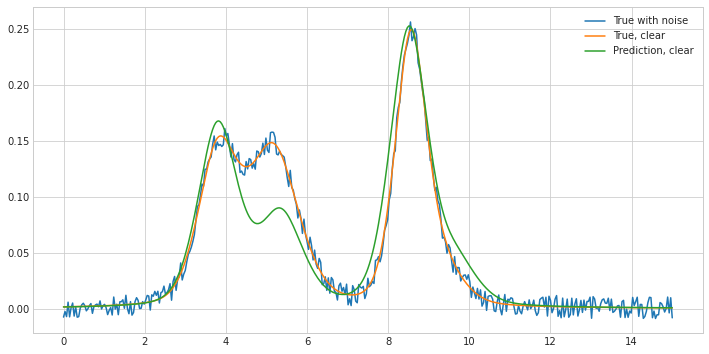

Predicted area: [19.11586]
     True area: 19.023570404289227
Predicted num_peak: [4.4971795]
     True num_peak: 5
Predicted amplitude: [0.16265802 0.0820132  0.24754015 0.03647463]
     True amplitude: [0.13458478 0.1397124  0.2414789  0.02781228]
Predicted center: [3.8040078 5.348305  8.514172  9.681285 ]
     True center: [3.79847311 5.17122386 8.56327177 9.41320992]
Predicted width: [1.1652757 1.2867384 1.1084269 1.1915259]
     True width: [1.15426506 1.48092886 0.93103785 1.10299888]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


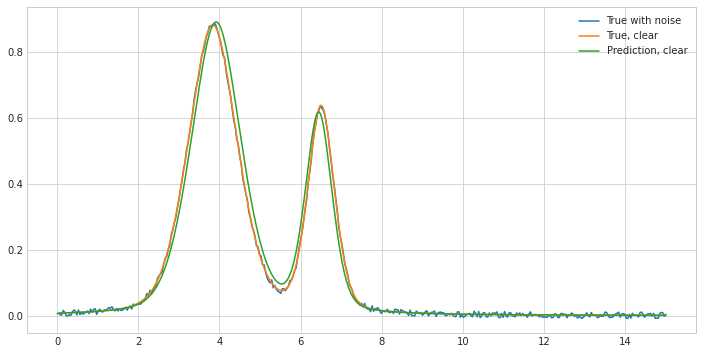

Predicted area: [54.287655]
     True area: 54.12994585828138
Predicted num_peak: [2.0007517]
     True num_peak: 2
Predicted amplitude: [ 0.88822633  0.60216695  0.00211598 -0.00525492]
     True amplitude: [0.87957515 0.62453154 0.         0.        ]
Predicted center: [ 3.9162405   6.4462504  -0.01303124 -0.00792708]
     True center: [3.83471995 6.50612869 0.         0.        ]
Predicted width: [1.4671892  0.79143596 0.0089711  0.01259521]
     True width: [1.44958389 0.78261304 0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


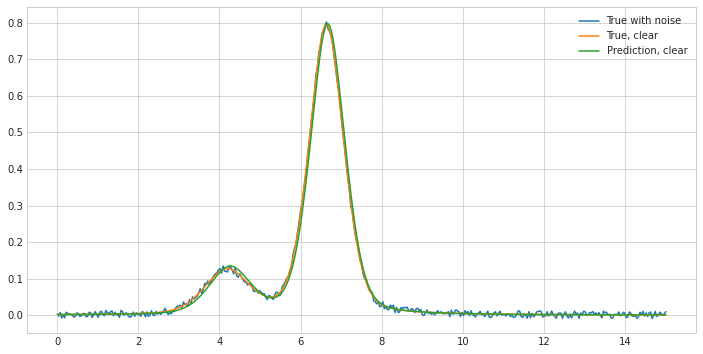

Predicted area: [29.868532]
     True area: 29.8495396694215
Predicted num_peak: [2.012151]
     True num_peak: 2
Predicted amplitude: [1.2665056e-01 7.9536611e-01 2.0525851e-03 7.0814230e-04]
     True amplitude: [0.11960679 0.79332396 0.         0.        ]
Predicted center: [ 4.254939e+00  6.669604e+00  3.391376e-02 -2.275601e-03]
     True center: [4.18102033 6.63699529 0.         0.        ]
Predicted width: [1.2192748  1.0120008  0.01577342 0.00558171]
     True width: [1.32220116 1.01918117 0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


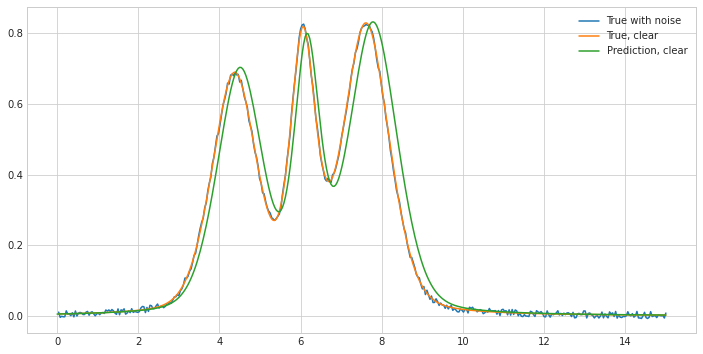

Predicted area: [79.29062]
     True area: 79.21808978023303
Predicted num_peak: [3.0260587]
     True num_peak: 3
Predicted amplitude: [ 0.6858093   0.7142158   0.8163465  -0.00817028]
     True amplitude: [0.67260883 0.73804192 0.81280054 0.        ]
Predicted center: [4.5065780e+00 6.1571670e+00 7.7878547e+00 6.1071962e-03]
     True center: [4.37019405 6.05605532 7.61274316 0.        ]
Predicted width: [1.3575103  0.7514144  1.4473045  0.00413582]
     True width: [1.34195017 0.74235043 1.38037098 0.        ]


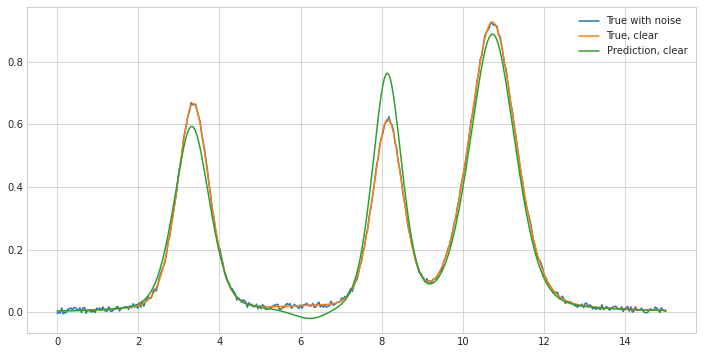

Predicted area: [75.65251]
     True area: 75.68444774915103
Predicted num_peak: [4.5209374]
     True num_peak: 5
Predicted amplitude: [ 0.59106207 -0.03735417  0.7496683   0.8834564 ]
     True amplitude: [0.66425168 0.00681812 0.60045712 0.92231986]
Predicted center: [ 3.3186944  6.2706165  8.133694  10.729543 ]
     True center: [ 3.35292321  6.1183538   8.14834544 10.72668885]
Predicted width: [1.0391366 1.1283877 0.8690425 1.3496016]
     True width: [0.95324833 1.28905881 0.89755428 1.38798476]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


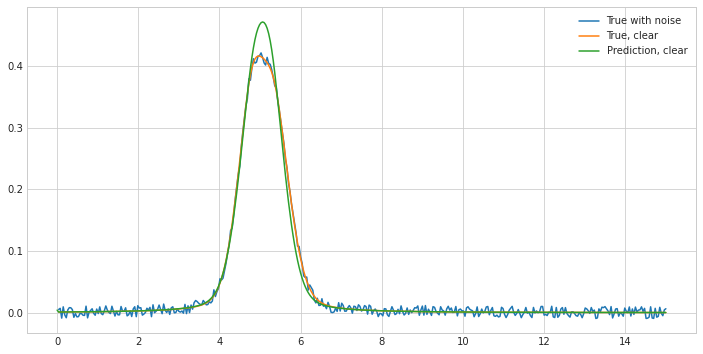

Predicted area: [15.898466]
     True area: 15.842681947631887
Predicted num_peak: [2.001083]
     True num_peak: 2
Predicted amplitude: [0.2808116  0.29414126 0.00267831 0.00573663]
     True amplitude: [0.3029843  0.28488055 0.         0.        ]
Predicted center: [ 4.8207946e+00  5.2696333e+00 -6.5686107e-03 -9.8909438e-04]
     True center: [4.78110004 5.374334   0.         0.        ]
Predicted width: [9.0470588e-01 8.8667512e-01 8.1005692e-04 2.1389276e-03]
     True width: [0.84577181 0.89769136 0.         0.        ]


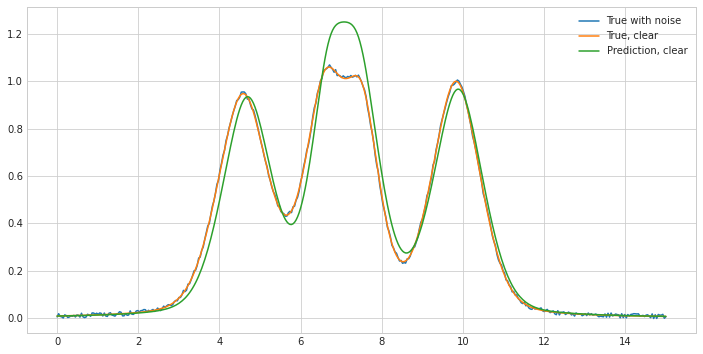

Predicted area: [142.24542]
     True area: 142.2400506741
Predicted num_peak: [4.5541105]
     True num_peak: 4
Predicted amplitude: [0.9071275  0.80624527 0.93587327 0.9445134 ]
     True amplitude: [0.9216648  0.89547243 0.78065596 0.98063039]
Predicted center: [4.688131  6.6687346 7.457366  9.888352 ]
     True center: [4.57879636 6.58570991 7.5261733  9.83466914]
Predicted width: [1.4575503 1.0781702 1.2211605 1.4597201]
     True width: [1.49872973 1.16271293 1.03439444 1.42349227]


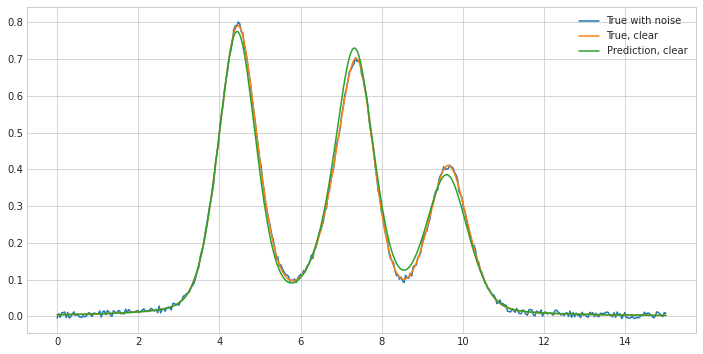

Predicted area: [67.78848]
     True area: 67.78823395419914
Predicted num_peak: [4.516688]
     True num_peak: 5
Predicted amplitude: [0.76709485 0.0480637  0.71154374 0.37289995]
     True amplitude: [0.7833986  0.15046103 0.60050096 0.39953277]
Predicted center: [4.4326954 6.3267713 7.329748  9.601507 ]
     True center: [4.45436597 6.80573663 7.40483345 9.6413066 ]
Predicted width: [1.130428  1.0826557 1.1601597 1.2498296]
     True width: [1.14859129 1.37520128 1.03694469 1.17553179]


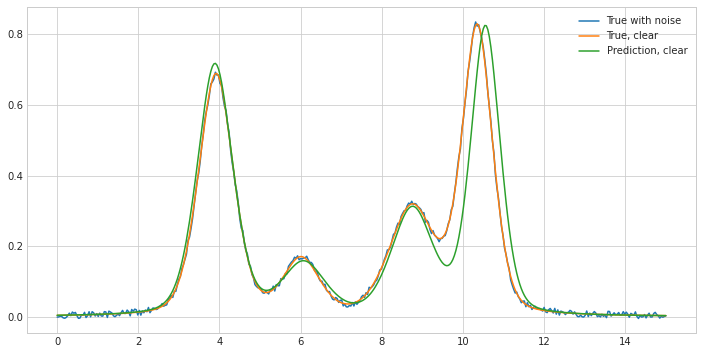

Predicted area: [61.933258]
     True area: 62.005354339933795
Predicted num_peak: [4.512422]
     True num_peak: 4
Predicted amplitude: [0.7134519  0.14409572 0.2987049  0.8162803 ]
     True amplitude: [0.68513977 0.15502123 0.30246622 0.81249962]
Predicted center: [ 3.8891752  6.0760226  8.752895  10.555795 ]
     True center: [ 3.91600609  6.01503483  8.74755318 10.35347685]
Predicted width: [1.0469888 1.263624  1.2359681 0.8666052]
     True width: [1.02822071 1.07086274 1.34880046 0.90096239]


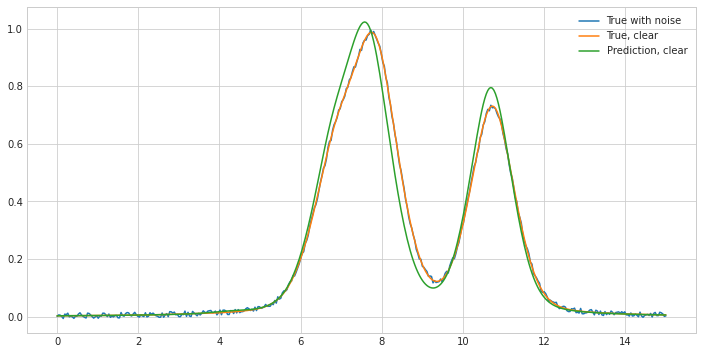

Predicted area: [83.51886]
     True area: 83.68864620928618
Predicted num_peak: [4.524348]
     True num_peak: 4
Predicted amplitude: [0.0045332 0.4187727 0.9012211 0.7826238]
     True amplitude: [0.0009164  0.45063325 0.86117666 0.71702565]
Predicted center: [ 4.213787  6.728202  7.672539 10.691031]
     True center: [ 3.16443174  6.81990118  7.84426769 10.72790169]
Predicted width: [0.9921253 1.2828143 1.3500946 1.2306453]
     True width: [0.7409279  1.36793758 1.36934563 1.29040049]


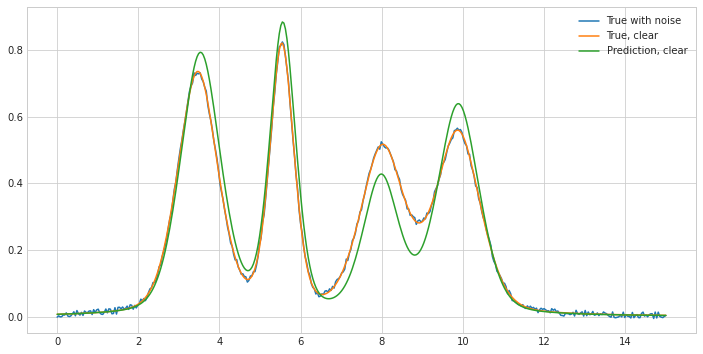

Predicted area: [85.96696]
     True area: 86.0196799756989
Predicted num_peak: [4.5221505]
     True num_peak: 4
Predicted amplitude: [0.78382516 0.86263174 0.404989   0.62913805]
     True amplitude: [0.72696245 0.79770456 0.49393849 0.5424066 ]
Predicted center: [3.5316906 5.560751  7.982378  9.88838  ]
     True center: [3.46490728 5.53838093 8.01623153 9.8788787 ]
Predicted width: [1.1801066  0.76113975 1.0579064  1.2297652 ]
     True width: [1.18733625 0.71157423 1.30518233 1.32450728]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


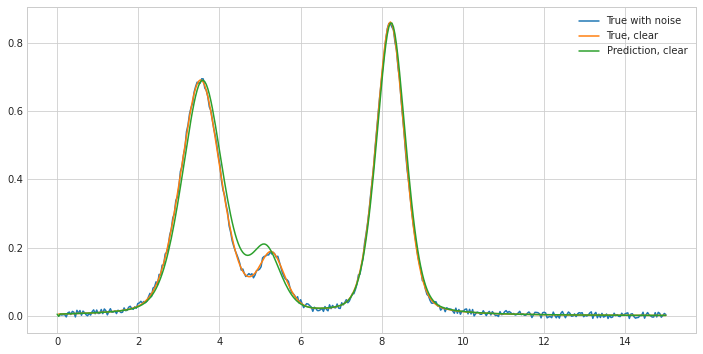

Predicted area: [51.74314]
     True area: 51.65436435594766
Predicted num_peak: [3.0220032]
     True num_peak: 3
Predicted amplitude: [ 0.68546337  0.17874882  0.855475   -0.01138575]
     True amplitude: [0.68767621 0.16577208 0.85770659 0.        ]
Predicted center: [3.5849025  5.135239   8.23093    0.02934037]
     True center: [3.53476531 5.28022711 8.21110537 0.        ]
Predicted width: [1.1991335  0.8785035  0.85724646 0.01889844]
     True width: [1.19005542 0.78699377 0.84694745 0.        ]


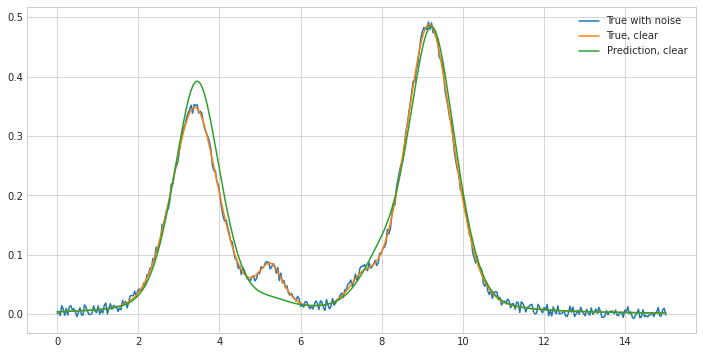

Predicted area: [38.837936]
     True area: 38.7377447271514
Predicted num_peak: [4.5170608]
     True num_peak: 4
Predicted amplitude: [0.39058018 0.01253953 0.06100185 0.48031768]
     True amplitude: [0.34601653 0.06951195 0.04167714 0.48655328]
Predicted center: [3.4502192 5.270207  7.890961  9.227786 ]
     True center: [3.39096037 5.25448826 7.50307451 9.16839795]
Predicted width: [1.3617704 1.0973325 1.1341112 1.3958879]
     True width: [1.4036537  0.7490496  0.79044484 1.42306248]


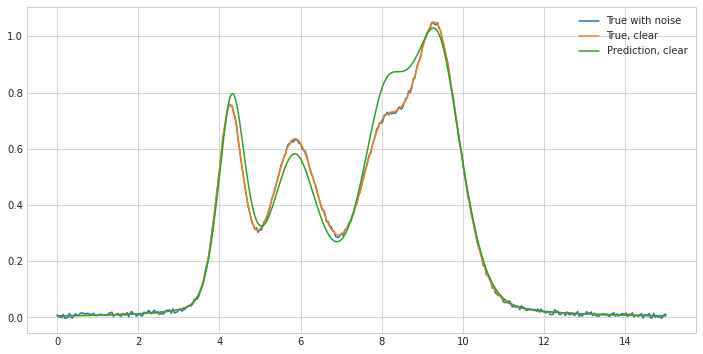

Predicted area: [110.00292]
     True area: 110.03482224257938
Predicted num_peak: [4.5308604]
     True num_peak: 4
Predicted amplitude: [0.7499153  0.5469582  0.7030516  0.92135066]
     True amplitude: [0.70759816 0.60450583 0.57578315 0.98019909]
Predicted center: [4.30929  5.852063 8.078414 9.370837]
     True center: [4.25635135 5.86015395 7.99333201 9.34980798]
Predicted width: [0.7934718 1.3920045 1.4085317 1.4258636]
     True width: [0.75267619 1.44879213 1.38087588 1.40006331]


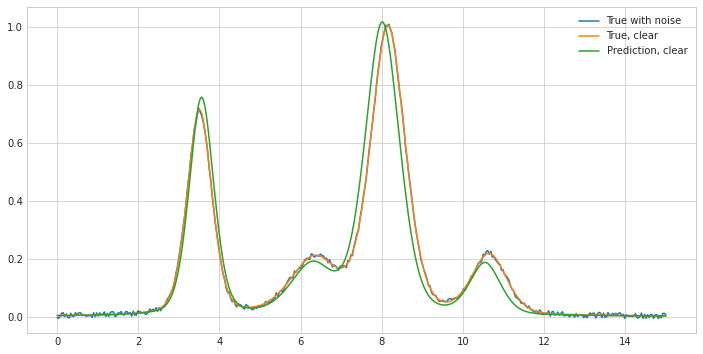

Predicted area: [62.019344]
     True area: 62.10924458010077
Predicted num_peak: [4.516834]
     True num_peak: 4
Predicted amplitude: [0.75297785 0.1682308  1.0104339  0.17639732]
     True amplitude: [0.70970864 0.19118058 0.99591535 0.20768257]
Predicted center: [ 3.5589077  6.286512   8.013393  10.546757 ]
     True center: [ 3.50902997  6.34341057  8.15272525 10.64627063]
Predicted width: [0.72385484 1.261476   1.0188954  0.90200526]
     True width: [0.72649464 1.42582372 1.01386564 1.02411361]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


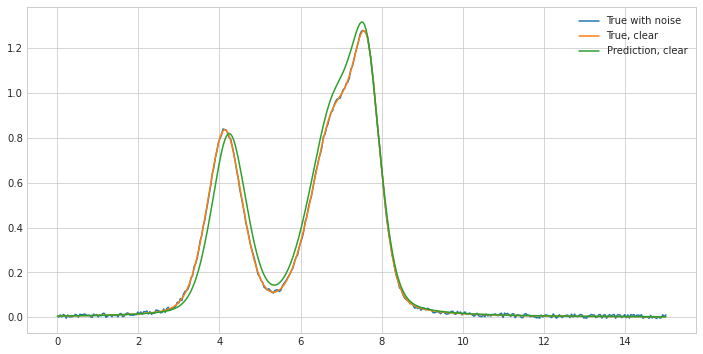

Predicted area: [84.84984]
     True area: 84.97613379112939
Predicted num_peak: [3.0439854]
     True num_peak: 3
Predicted amplitude: [ 0.8020358  0.8793229  0.9392285 -0.0059778]
     True amplitude: [0.82212862 0.84266892 0.95201506 0.        ]
Predicted center: [ 4.237614   6.7923756  7.610138  -0.037995 ]
     True center: [4.13089201 6.80921205 7.63474551 0.        ]
Predicted width: [1.0317161  1.393789   0.8622794  0.01036137]
     True width: [1.0407696  1.33388559 0.81315876 0.        ]


In [ ]:
for i in range(30):
    
    test_amp[i] = np.array(test_amp[i])
    test_center[i] = np.array(test_center[i])
    test_width[i] = np.array(test_width[i])
    
    test_params = np.stack((test_amp[i], test_center[i], test_width[i]))
    test_params = test_params.T.reshape(3*N)
    test_params = list(test_params)
    
    #########################################################
    prediction[2][i] = np.array(prediction[2][i])
    prediction[3][i] = np.array(prediction[3][i])
    prediction[4][i] = np.array(prediction[4][i])
    
    predict_params = np.stack((prediction[2][i], prediction[3][i], prediction[4][i]))
    predict_params = predict_params.T.reshape(3*N)
    predict_params = list(predict_params)
    
    ########################################################
    print('======================================================================')
    plt.figure(figsize = (12, 6))
    plt.plot(x, voigt_noise(x, *test_params), label = 'True with noise')
    plt.plot(x, voigt(x, *test_params), label = 'True, clear')
    plt.plot(x, voigt(x, *predict_params), label = 'Prediction, clear')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    print("Predicted area:", prediction[0][i])
    print("     True area:", test_area[i])

    print("Predicted num_peak:", prediction[1][i])
    print("     True num_peak:", test_num_peak[i])

    print("Predicted amplitude:", prediction[2][i])
    print("     True amplitude:", test_amp[i] )

    print("Predicted center:", prediction[3][i])
    print("     True center:", test_center[i])

    print("Predicted width:", prediction[4][i])
    print("     True width:", test_width[i])
    print('======================================================================')
    
    

# Real XPS data fitting

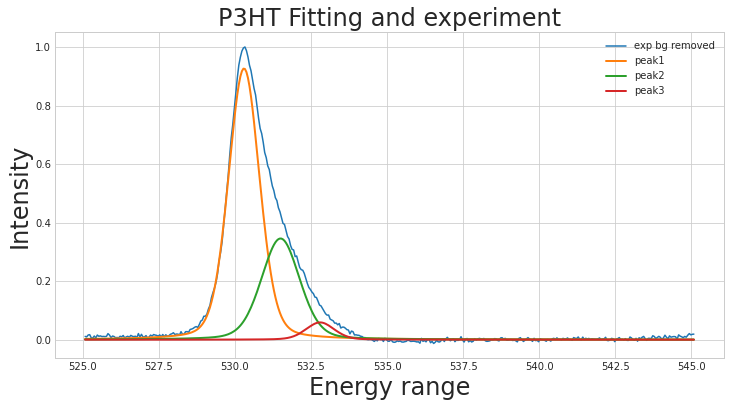

In [ ]:
plt.style.use(["seaborn-whitegrid"])
plt.figure(figsize = (12, 6))

# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

# 테스트하고자 하는 실제 XPS 데이터의 parameter 범위가 너무 크므로 
# 네트워크 자체는 작은 규모의 파라미터 범위에서 학습시키고,
# 테스트할 경우, 범위를 줄인 xps 데이터를 불러와서 테스트해본다..

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

#plt.plot(fitting[:, 0], fitting[:, 1] - bg[:, 1], label = "fitting", linewidth = 2)

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)

plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()


In [ ]:
# normalize된 그래프의 y값

test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [ ]:
predict = model.predict(test_result)
print(predict)


[array([[39.012215]], dtype=float32), array([[4.5247254]], dtype=float32), array([[ 0.20262593, -0.06151289,  0.26598018,  1.0096178 ]],
      dtype=float32), array([[ 4.068665,  6.168921,  8.768084, 10.604387]], dtype=float32), array([[0.6719842 , 0.99766773, 1.5538532 , 0.89637756]], dtype=float32)]


In [ ]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [ ]:
new_predict

[array([39.012215], dtype=float32),
 array([4.5247254], dtype=float32),
 array([ 0.20262593, -0.06151289,  0.26598018,  1.0096178 ], dtype=float32),
 array([ 4.068665,  6.168921,  8.768084, 10.604387], dtype=float32),
 array([0.6719842 , 0.99766773, 1.5538532 , 0.89637756], dtype=float32)]

In [ ]:
print(new_predict[0].shape)  # area
print(new_predict[1].shape)  # num_peak
print(new_predict[2].shape)  # amplitude
print(new_predict[3].shape)  # center
print(new_predict[4].shape)  # width

(1,)
(1,)
(4,)
(4,)
(4,)


In [ ]:
peak_1 = [new_predict[2][0], new_predict[3][0], new_predict[4][0]]
peak_2 = [new_predict[2][1], new_predict[3][1], new_predict[4][1]]
peak_3 = [new_predict[2][2], new_predict[3][2], new_predict[4][2]]

predict_params = peak_1 + peak_2 + peak_3

# 비교

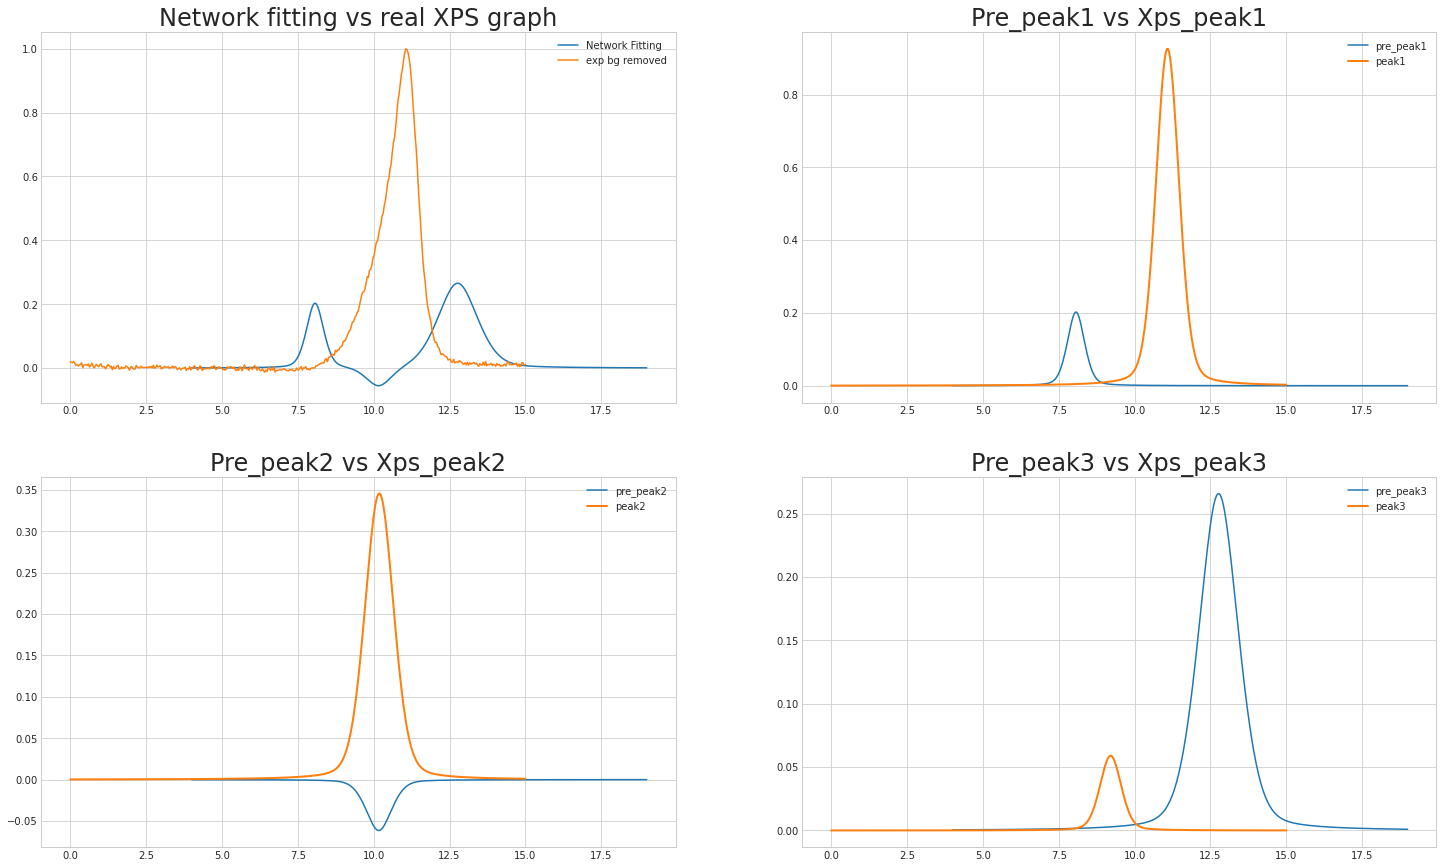

In [ ]:
plt.figure(figsize = (25, 15))

plt.subplot(221)
plt.plot(x+4, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()


plt.subplot(222)
plt.plot(x+4, voigt(x, *predict_params[:3]), label = 'pre_peak1')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


plt.subplot(223)
plt.plot(x+4, voigt(x, *predict_params[3:6]), label = 'pre_peak2')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()


plt.subplot(224)
plt.plot(x+4, voigt(x, *predict_params[6:]), label = 'pre_peak3')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()
plt.show()




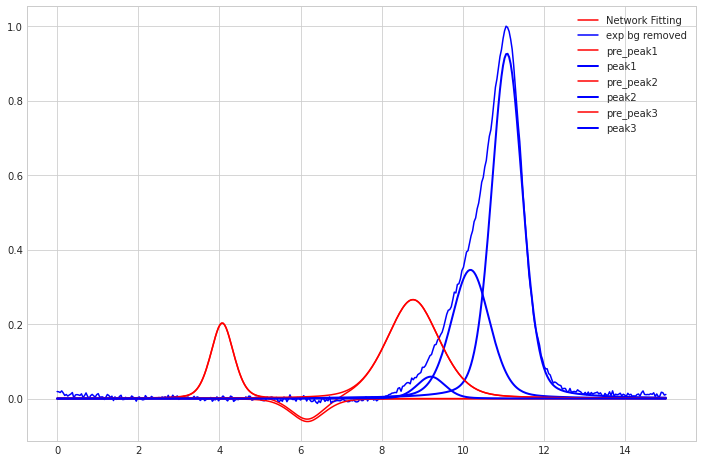

In [ ]:
plt.figure(figsize = (12, 8))

plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting', color = 'red')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",  color = 'blue')


plt.plot(x, voigt(x, *predict_params[:3]), label = 'pre_peak1',  color = 'red')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2, color = 'blue')


plt.plot(x, voigt(x, *predict_params[3:6]), label = 'pre_peak2',  color = 'red')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2, color = 'blue')

plt.plot(x, voigt(x, *predict_params[6:]), label = 'pre_peak3',  color = 'red')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2, color = 'blue')

plt.legend()
plt.show()



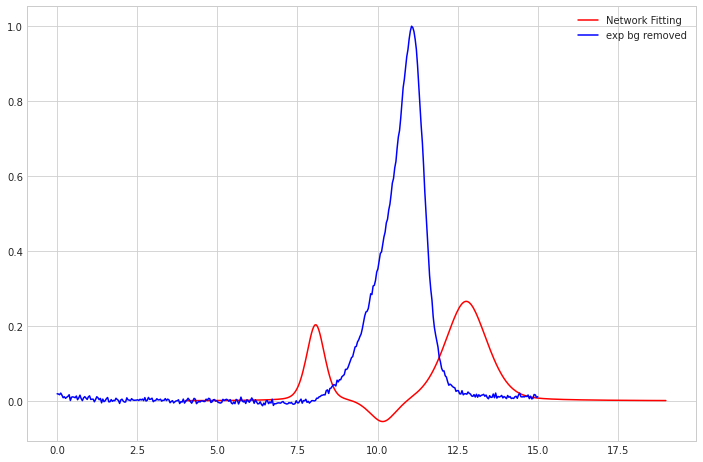

In [ ]:
plt.figure(figsize = (12, 8))

plt.plot(x+4, voigt(x, *predict_params), label = 'Network Fitting', color = 'red')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",  color = 'blue')

plt.legend()
plt.show()



In [ ]:
# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

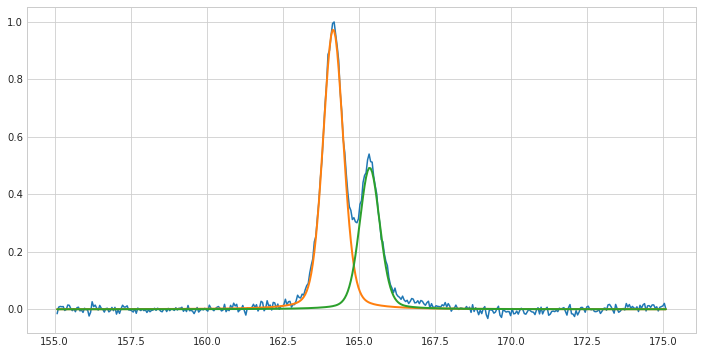

In [ ]:
plt.figure(figsize = (12, 6))

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)


In [ ]:
# normalize된 그래프의 y값
test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [ ]:
predict = model.predict(test_result)
print(predict)

[array([[27.883684]], dtype=float32), array([[3.1073885]], dtype=float32), array([[0.04215458, 0.21768121, 1.1550838 , 0.03914632]], dtype=float32), array([[ 4.6025496 ,  6.8610964 ,  8.549982  , -0.02159353]],
      dtype=float32), array([[ 0.9458176 ,  0.77673805,  0.630934  , -0.01945506]],
      dtype=float32)]


In [ ]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [ ]:
new_predict

[array([27.883684], dtype=float32),
 array([3.1073885], dtype=float32),
 array([0.04215458, 0.21768121, 1.1550838 , 0.03914632], dtype=float32),
 array([ 4.6025496 ,  6.8610964 ,  8.549982  , -0.02159353], dtype=float32),
 array([ 0.9458176 ,  0.77673805,  0.630934  , -0.01945506], dtype=float32)]

In [ ]:
print(new_predict[0].shape)  # area
print(new_predict[1].shape)  # num_peak
print(new_predict[2].shape)  # amplitude
print(new_predict[3].shape)  # center
print(new_predict[4].shape)  # width

(1,)
(1,)
(4,)
(4,)
(4,)


In [ ]:
peak_1 = [new_predict[2][0], new_predict[3][0], new_predict[4][0]]
peak_2 = [new_predict[2][1], new_predict[3][1], new_predict[4][1]]
peak_3 = [new_predict[2][2], new_predict[3][2], new_predict[4][2]]

predict_params = peak_1 + peak_2 + peak_3

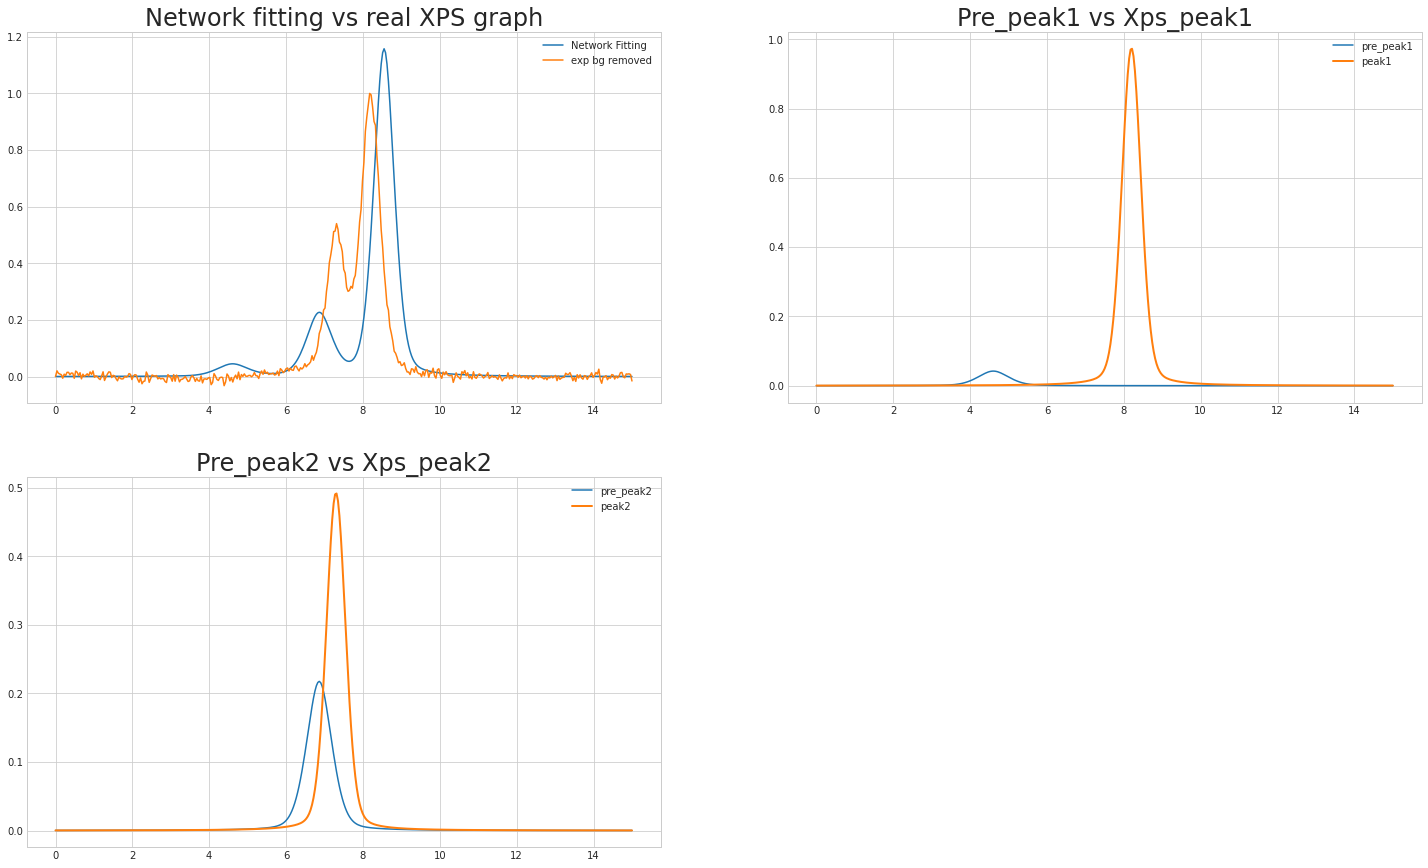

In [ ]:
plt.figure(figsize = (25, 15))

plt.subplot(221)
plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()


plt.subplot(222)
plt.plot(x, voigt(x, *predict_params[:3]), label = 'pre_peak1')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


plt.subplot(223)
plt.plot(x, voigt(x, *predict_params[3:6]), label = 'pre_peak2')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()


#plt.subplot(224)
#plt.plot(x+4, voigt(x, *predict_params[6:]), label = 'pre_peak3')
#plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)
#plt.title("Pre_peak3 vs Xps_peak3", size = 24)
#plt.legend()
#plt.show()



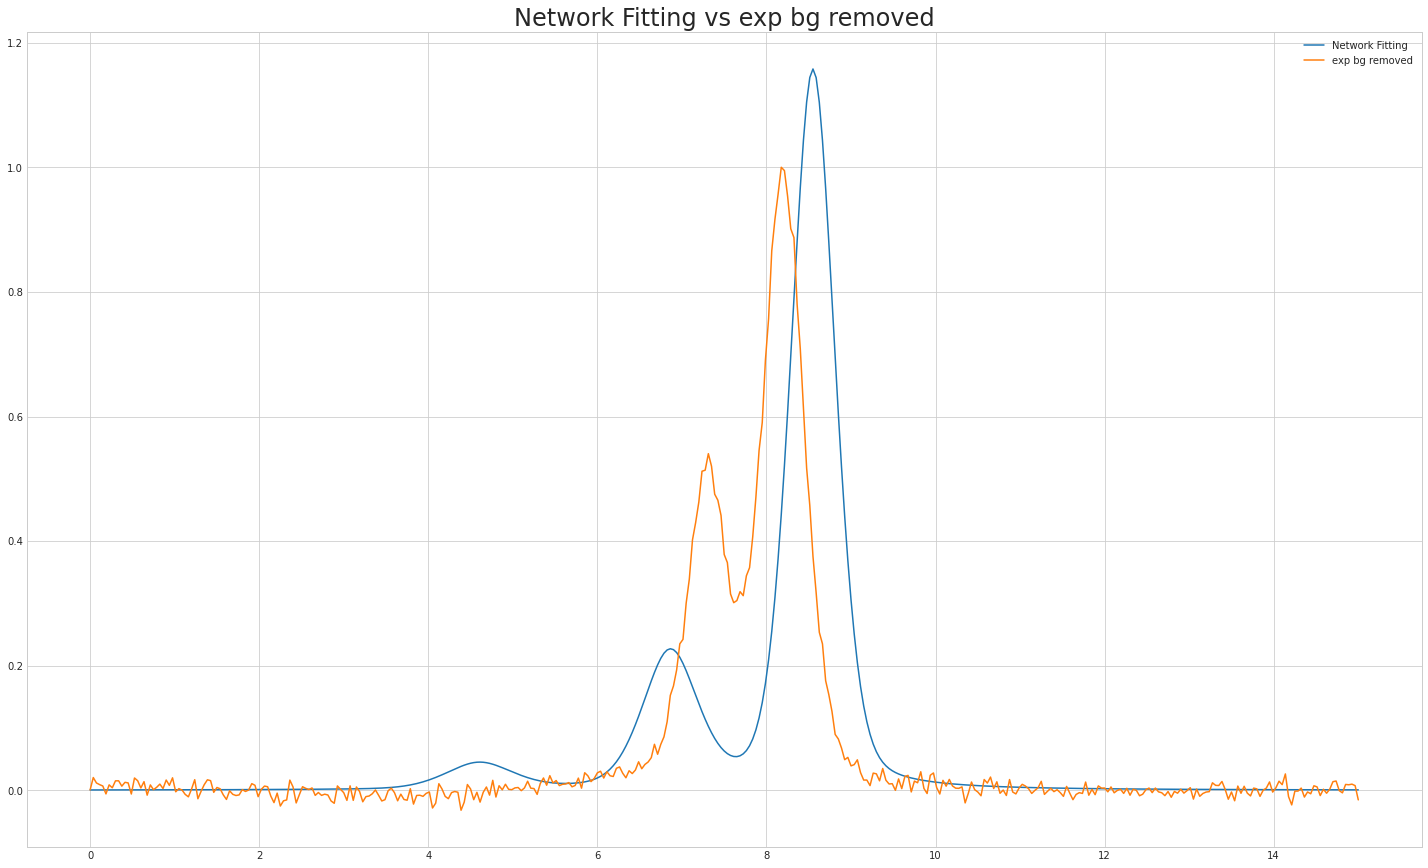

In [ ]:
plt.figure(figsize = (25, 15))

plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

plt.title("Network Fitting vs exp bg removed", size = 24)
plt.legend()
plt.show()


